<a href="https://colab.research.google.com/github/jazkre/01ZLMA/blob/main/R/Copy_of_01ZLMA_zapoctova_uloha_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadání zápočtové úlohy z předmětu 01ZLMA 2022/2023

# Vypracovala skupina: s(h)RimpzForR🍤


> > > >Maryshchyn, Molnárová, Kreanová

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients





In [10]:
# Install and load necessary libraries
#install.packages("readxl")
library(readxl)
library(tidyverse)

In [11]:

# Original URL of the dataset
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"

# Temporary file to store the downloaded data
temp <- tempfile(fileext = ".xls")

# Download the file
download.file(url, temp, mode = "wb")

# Read the Excel file
df <- read_excel(temp,skip = 1,col_names = TRUE)

# Remove the temporary file
unlink(temp)

In [12]:
df <- df %>%
  rename(default = `default payment next month`)
df %>% head()
data <- df

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,⋯,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,⋯,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,⋯,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [13]:
colnames(df)

# PAY_0 - PAY_6 ... history of past payments (past monthly payment records)
#      -1 = pay duly (riadne splatené)
#       1 = payment delay for one month
#       2 = payment delay for two months . . .
#       8 = payment delay for eight months
#       9 = payment delay for nine months and above

# BILL_AMT1 - BILL_AMT6 ... amount of bill statement (výpis z účtu) from the past 6 months

# PAY_AMT1 - PAY_AMT6 ... payment amount

[1] "ID"        "LIMIT_BAL" "SEX"       "EDUCATION" "MARRIAGE"  "AGE"      
 [7] "PAY_0"     "PAY_2"     "PAY_3"     "PAY_4"     "PAY_5"     "PAY_6"    
[13] "BILL_AMT1" "BILL_AMT2" "BILL_AMT3" "BILL_AMT4" "BILL_AMT5" "BILL_AMT6"
[19] "PAY_AMT1"  "PAY_AMT2"  "PAY_AMT3"  "PAY_AMT4"  "PAY_AMT5"  "PAY_AMT6" 
[25] "default"

In [14]:
# Get column names that start with "bill_amt" or "pay_amt"
colnames(data) <- tolower(colnames(data))
bill_cols <- grep("^bill_amt", names(data), value = TRUE)
pay_cols <- grep("^pay_amt", names(data), value = TRUE)

# Compute min and max for each row from columns starting with "bill_amt" or "pay_amt"
data <- data %>%
  mutate(
    bill_min = pmap_dbl(select(., starts_with("bill_amt")), min, na.rm = TRUE),
    bill_max = pmap_dbl(select(., starts_with("bill_amt")), max, na.rm = TRUE),
    pay_min = pmap_dbl(select(., starts_with("pay_amt")), min, na.rm = TRUE),
    pay_max = pmap_dbl(select(., starts_with("pay_amt")), max, na.rm = TRUE)
  ) %>%
  select(-all_of(bill_cols), -all_of(pay_cols), -c("id","pay_2","pay_3","pay_4","pay_5"))

data %>% head()

limit_bal,sex,education,marriage,age,pay_0,pay_6,default,bill_min,bill_max,pay_min,pay_max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20000,2,2,1,24,2,-2,1,0,3913,0,689
120000,2,2,2,26,-1,2,1,1725,3455,0,2000
90000,2,2,2,34,0,0,0,13559,29239,1000,5000
50000,2,2,1,37,0,0,0,28314,49291,1000,2019
50000,1,2,1,57,-1,0,0,5670,35835,679,36681
50000,1,1,2,37,0,0,0,19394,64400,657,2500


In [15]:
data <- data %>%
  filter(!(bill_min <= 0 | pay_max <= 0),
         !(marriage == 0 | marriage == 3),
         !(education == 0)) %>%
  mutate(education = ifelse(education >= 3, 3, education)) %>%
  mutate(sex = factor(sex),
        education = factor(education),
        marriage = factor(marriage))

In [16]:
summary(data)
dim(data)

   limit_bal       sex       education marriage       age       
 Min.   :  10000   1: 8843   1: 7200   1:10018   Min.   :21.00  
 1st Qu.:  50000   2:13100   2:10809   2:11925   1st Qu.:28.00  
 Median : 130000             3: 3934             Median :34.00  
 Mean   : 162801                                 Mean   :35.27  
 3rd Qu.: 230000                                 3rd Qu.:41.00  
 Max.   :1000000                                 Max.   :79.00  
     pay_0            pay_6             default          bill_min     
 Min.   :-2.000   Min.   :-2.00000   Min.   :0.0000   Min.   :     1  
 1st Qu.: 0.000   1st Qu.: 0.00000   1st Qu.:0.0000   1st Qu.:  4596  
 Median : 0.000   Median : 0.00000   Median :0.0000   Median : 19852  
 Mean   : 0.086   Mean   : 0.02133   Mean   :0.2222   Mean   : 43168  
 3rd Qu.: 0.000   3rd Qu.: 0.00000   3rd Qu.:0.0000   3rd Qu.: 55952  
 Max.   : 8.000   Max.   : 8.00000   Max.   :1.0000   Max.   :551702  
    bill_max         pay_min         pay_max    

[1] 21943    12

In [17]:
data_table <- data %>%
   dplyr::select(default,age, sex, education, marriage, limit_bal) %>%
   mutate(age             = cut(age, breaks=c(-Inf, 25,30,35,40,Inf),labels=c("20","25","30","35","40")),
          limit_bal  = cut(limit_bal, breaks=c(-Inf,50000, 100000,150000,200000,Inf),labels=c("50","100","150","200","250"))) %>%
  group_by(age,limit_bal,sex) %>%
  summarise(n = n(),
         default_yes = sum(default),
         default_no = n - sum(default)
        ) %>%
  select(-c("n"))

data_table %>% head()

`summarise()` has grouped output by 'age', 'limit_bal'. You can override using
the `.groups` argument.


age,limit_bal,sex,default_yes,default_no
<fct>,<fct>,<fct>,<dbl>,<dbl>
20,50,1,210,444
20,50,2,326,710
20,100,1,23,94
20,100,2,146,439
20,150,1,12,43
20,150,2,46,213


In [18]:
install.packages("caret")
library(caret)

# Set the seed for reproducibility
set.seed(42)

# Create a stratified random sample of the row numbers
train_rows <- createDataPartition(data$default, p = 0.7, list = FALSE)

# Split the data into training and testing sets
train_data <- data[train_rows, ]
test_data <- data[-train_rows, ]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [19]:
dim(train_data)
dim(test_data)

[1] 15361    12

[1] 6582   12

## Zadání

## 01 - Grafické zobrazení dat a jejich kontrola

Použijte dataset `data_train` a `data_test`.

* Navrhněte vhodný způsob zobrazení dat, který vám pomůže určit, zdali použití logistické regrese pro predikci nesplacení úvěru je možné a vhodné při použítí zvolených trénovacích a testovacích dat.
* Vykreslete boxploty pro různé numerické proměnné, odezvu `default` a barevně odlište kategorické proměnné. Je z těchto obrázků možné odhadnout jaká proměnná bude mít vliv na odezvu? (jen `data_train`).
* Pro vybrané skupiny z předešlé otázky navrhněte vhodný statistický test, proveďte ho a řekněte zdali je vámi zvolená proměnná statisticky významná pro určení schopnosti splácet (jen `data_train`).

In [20]:
install.packages("GGally")
library(GGally)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


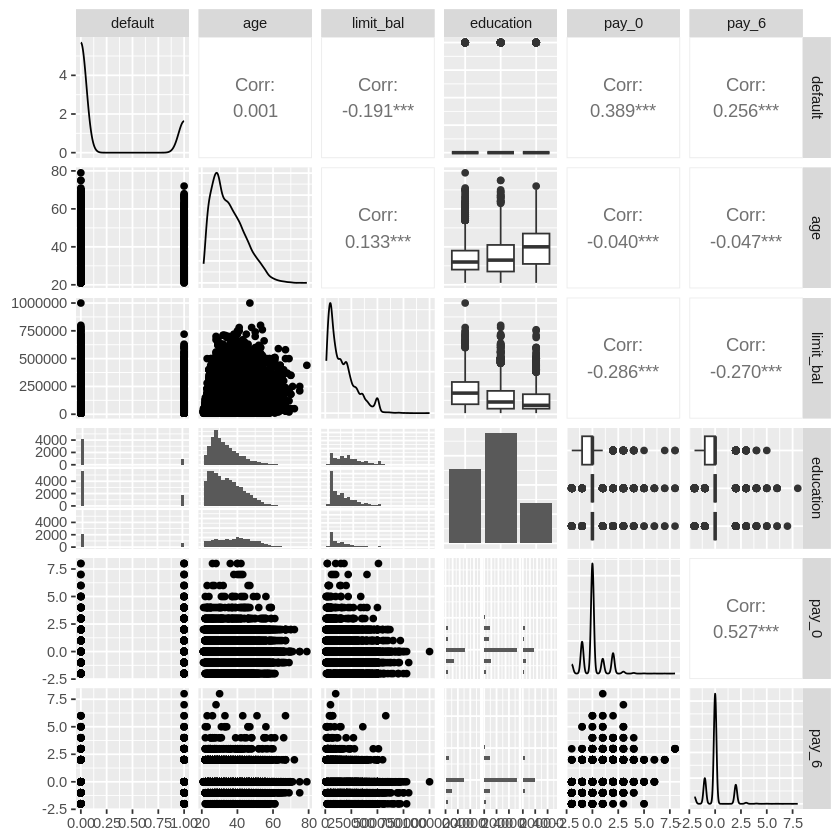

In [21]:
ggpairs(train_data  %>% dplyr::select(default, age, limit_bal, education, pay_0, pay_6))

Odozvou je v danej úlohe premenná `default`. Z výstupu ggpairs je vidieť, že sa jedná o binárnu premennú. Typickým modelom užívaným pre binárne dáta je model logistickej regresie.

Skúmajme taktiež rozdelenie dát na trénovacie a testovacie. To je možné prostredníctvom histogramu s jadrovým odhadom hustoty.

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


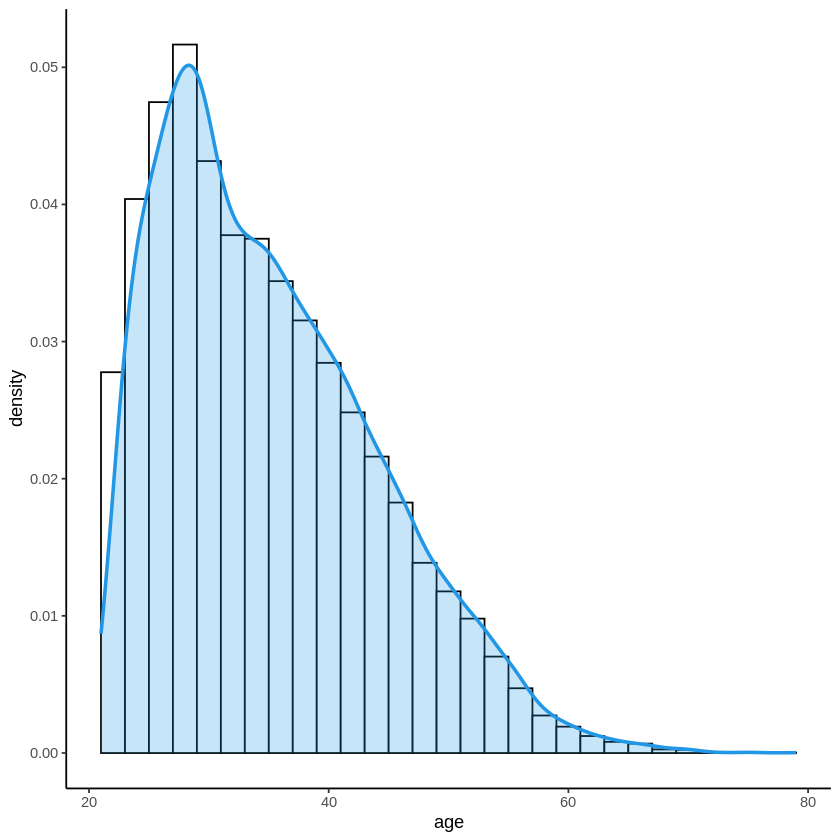

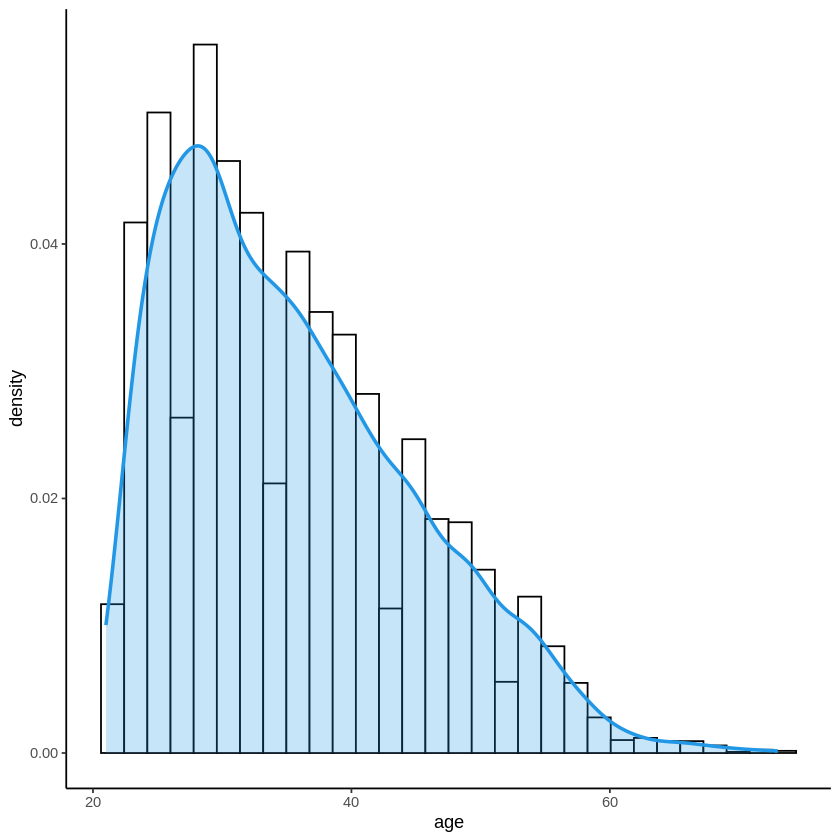

In [22]:
## premenná age
 # train data
ggplot(data = train_data, aes(x = age)) +
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "white") +
  geom_density(lwd = 1, colour = 4,
               fill = 4, alpha = 0.25) +
  theme_classic()

 # test data
ggplot(data = test_data, aes(x = age)) +
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "white") +
  geom_density(lwd = 1, colour = 4,
               fill = 4, alpha = 0.25) +
  theme_classic()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


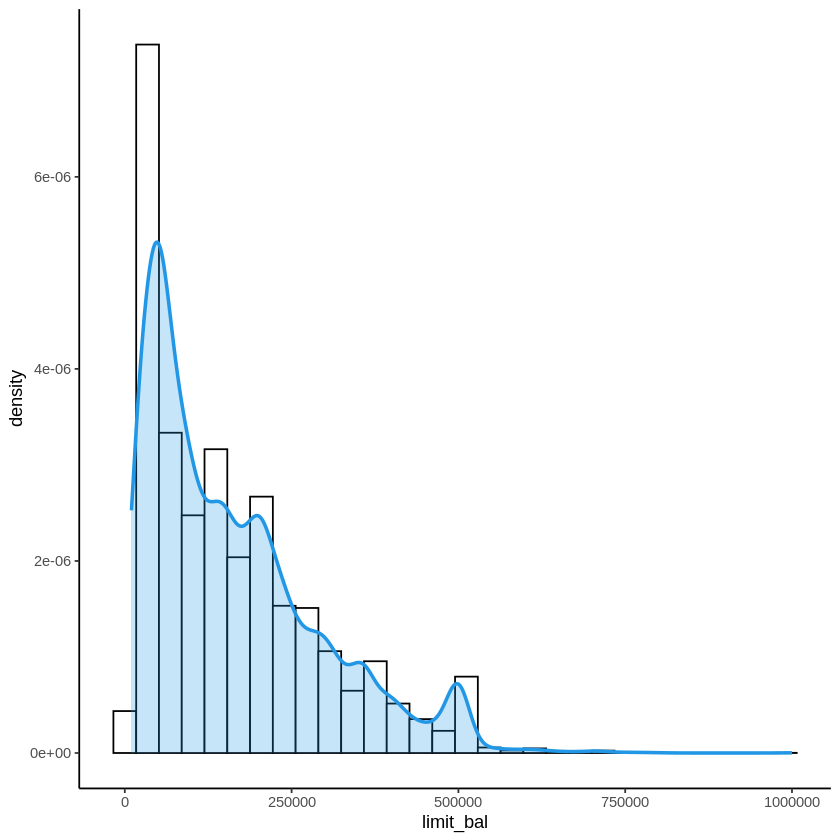

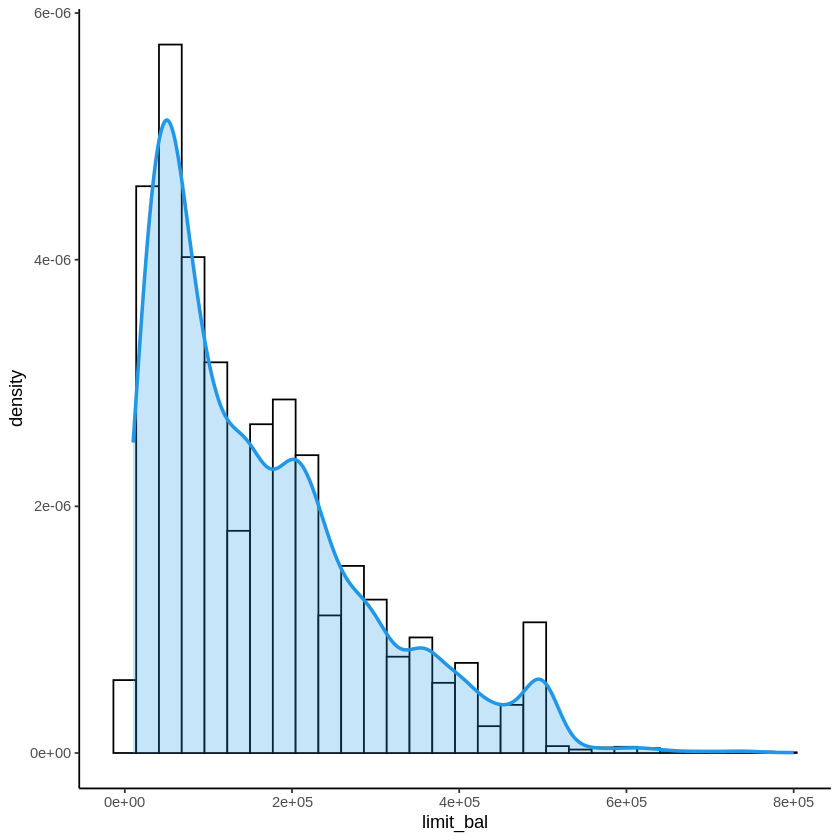

In [23]:
## premenná limit_bal
 # train data
ggplot(data = train_data, aes(x = limit_bal)) +
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "white") +
  geom_density(lwd = 1, colour = 4,
               fill = 4, alpha = 0.25) +
  theme_classic()

 # test data
ggplot(data = test_data, aes(x = limit_bal)) +
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "white") +
  geom_density(lwd = 1, colour = 4,
               fill = 4, alpha = 0.25) +
  theme_classic()

Z grafov vyššie vykreslených pre premenné `age` a `limit_bal` vidíme, že jadrové odhady hustôt pre testovacie a trénovacie dáta sa od seba odlišujú iba veľmi málo. Pre predikciu nesplatenia úveru je tak pri daných trénovacích a testovacích dátach možné použiť logistickú regresiu.

Pokúsme sa preto ďalej pomocou vizualizácie dát odhadnúť, ktoré premenné budú mať vplyv na výslednú hodnotu odozvy v logistickej regresii. Vhodným vizualizačným prostriedkom pre tento účel sú práve boxploty.

Nižšie sú vypísané typy jednotlivých atribútov. V boxplotoch môžeme naraz využiť ako numerické premenné, tak faktorové premenné pre skúmanie viacero závislostí zároveň. Z numerických premenných tu uvedieme boxploty pre `limit_bal`, `bill_min`, `bill_max` a `age`. Z kategorických zase premenné `sex` a `education`.

In [24]:
## BOXPLOTY
str(train_data)

tibble [15,361 × 12] (S3: tbl_df/tbl/data.frame)
 $ limit_bal: num [1:15361] 120000 90000 50000 500000 140000 260000 630000 250000 130000 70000 ...
 $ sex      : Factor w/ 2 levels "1","2": 2 2 1 1 2 2 2 1 2 2 ...
 $ education: Factor w/ 3 levels "1","2","3": 2 2 2 1 3 1 2 1 3 2 ...
 $ marriage : Factor w/ 2 levels "1","2": 2 2 1 2 1 2 2 2 2 2 ...
 $ age      : num [1:15361] 26 34 57 29 28 51 41 29 39 26 ...
 $ pay_0    : num [1:15361] -1 0 -1 0 0 -1 -1 0 0 2 ...
 $ pay_6    : num [1:15361] 2 0 0 0 0 2 -1 0 -1 2 ...
 $ default  : num [1:15361] 1 0 0 0 0 0 0 0 0 1 ...
 $ bill_min : num [1:15361] 1725 13559 5670 367965 3719 ...
 $ bill_max : num [1:15361] 3455 29239 35835 542653 14096 ...
 $ pay_min  : num [1:15361] 0 1000 679 13750 0 ...
 $ pay_max  : num [1:15361] 2000 5000 36681 55000 3329 ...


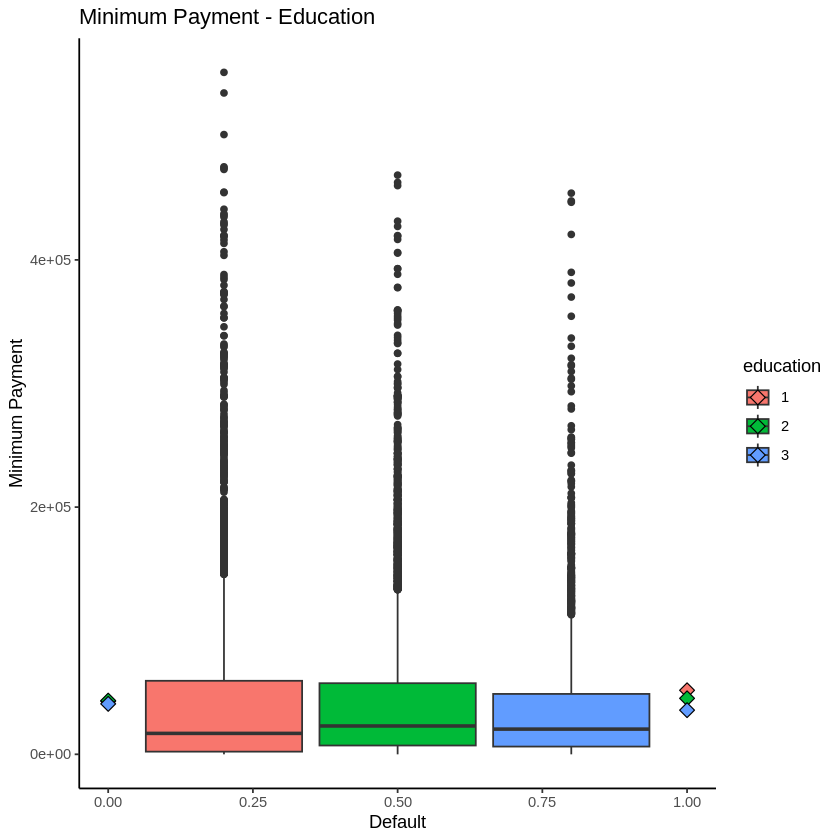

In [25]:
 # default-bill_min-education
ggplot(train_data, aes(x = default, y = bill_min, fill = education)) +
  geom_boxplot()+
  labs(title="Minimum Payment - Education",x="Default", y = "Minimum Payment")+
  stat_summary(fun = mean, geom = "point", shape = 23, size = 3) +
  theme_classic()

In [26]:
 # test štatistickej významnosti bill_min
t.test(bill_min ~ default, data = train_data)


	Welch Two Sample t-test

data:  bill_min by default
t = -2.0484, df = 5346.1, p-value = 0.04057
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -4755.3372  -104.3518
sample estimates:
mean in group 0 mean in group 1 
       42813.96        45243.81 


Ako test štatistickej významnosti závislosti medzi premennými `bill_min` a `default` bol volený t-test, nakoľko sa jedná o závislosť spojitej premennej a faktorovej premennej s dvoma úrovňami. Jeho p-hodnota vyšla 0.04057, keby teda volíme hladinu významnosti 0.05, hypotézu o štatistickej významnosti `bill_min` by sme tesne nezamietli. Rovnakým spôsobom postupujeme aj pre zvyšné numerické premenné.

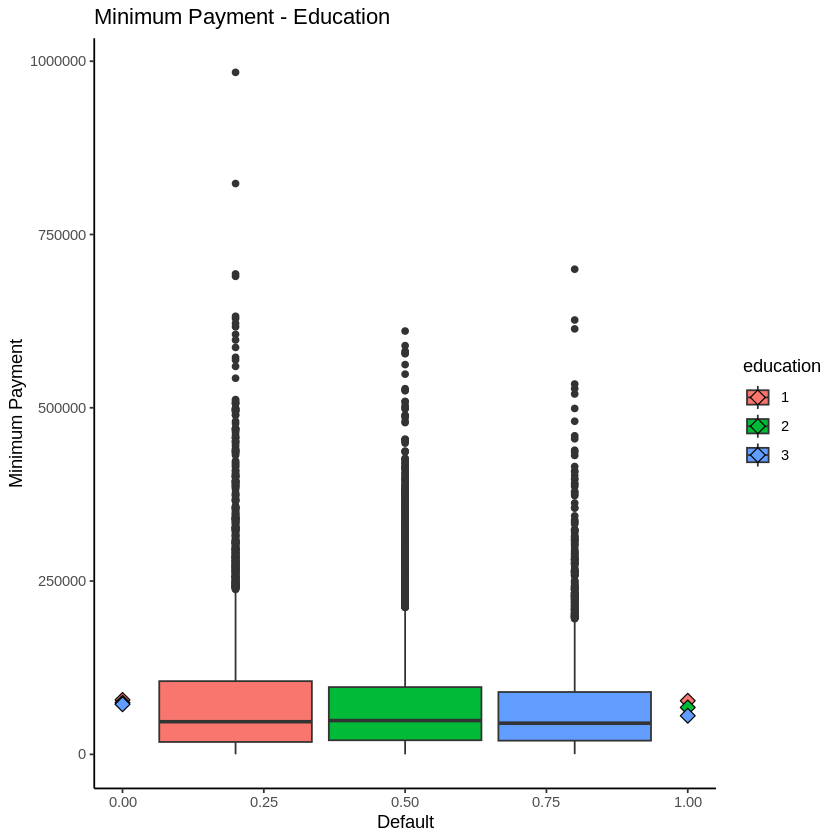

In [27]:
 # default-bill_max-education
ggplot(train_data, aes(x = default, y = bill_max, fill = education)) +
  geom_boxplot()+
  labs(title="Minimum Payment - Education",x="Default", y = "Minimum Payment")+
  stat_summary(fun = mean, geom = "point", shape = 23, size = 3) +
  theme_classic()

In [28]:
 # test štatistickej významnosti bill_max
t.test(bill_max ~ default, data = train_data)


	Welch Two Sample t-test

data:  bill_max by default
t = 4.7402, df = 5540.9, p-value = 2.189e-06
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
  4388.122 10577.448
sample estimates:
mean in group 0 mean in group 1 
       75492.55        68009.76 


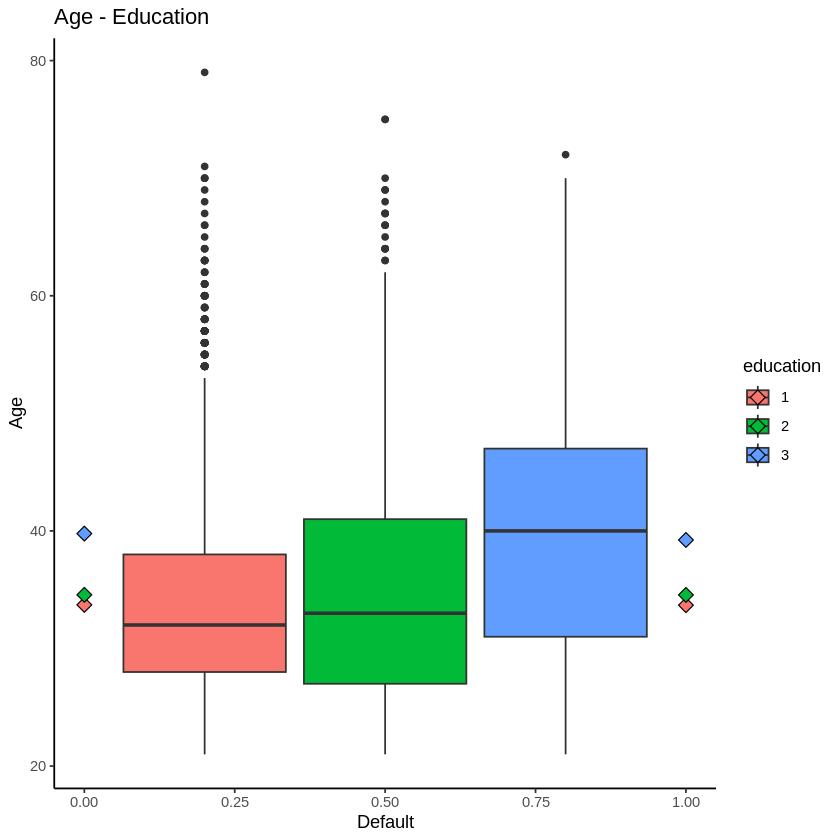

In [29]:
 # default-age-education
ggplot(train_data, aes(x = default, y = age, fill = education)) +
  geom_boxplot()+
  labs(title="Age - Education",x="Default", y = "Age")+
  stat_summary(fun = mean, geom = "point", shape = 23, size = 3) +
  theme_classic()

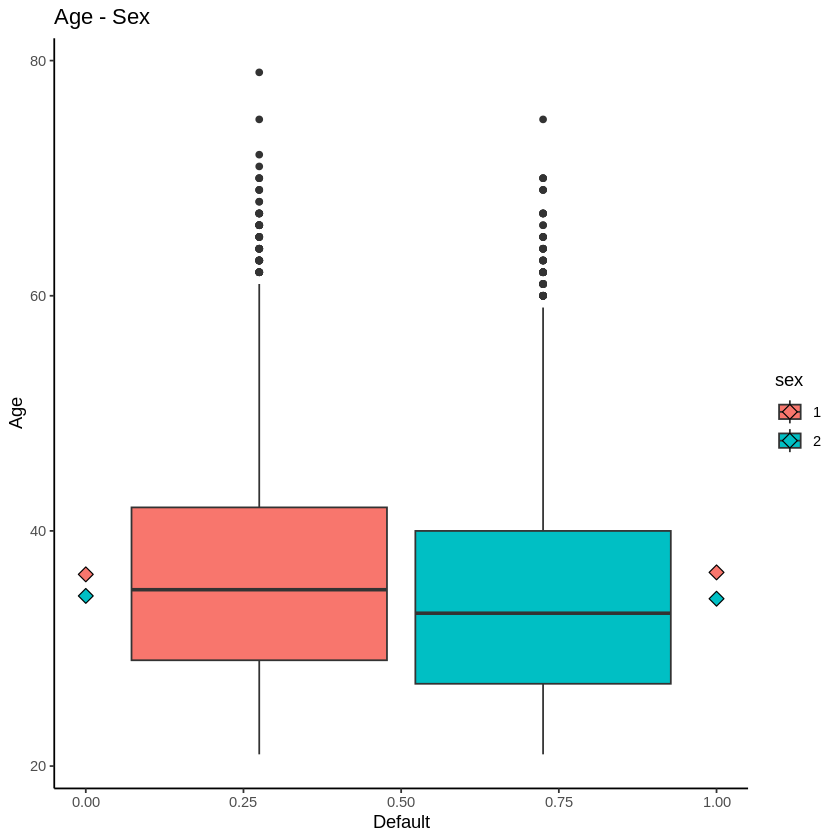

In [30]:
 # default-age-sex
ggplot(train_data, aes(x = default, y = age, fill = sex)) +
  geom_boxplot()+
  labs(title="Age - Sex",x="Default", y = "Age")+
  stat_summary(fun = mean, geom = "point", shape = 23, size = 3) +
  theme_classic()

In [31]:
 # test štatistickej významnosti age
t.test(age ~ default, data = train_data)


	Welch Two Sample t-test

data:  age by default
t = -0.11497, df = 5340.6, p-value = 0.9085
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.3760057  0.3343466
sample estimates:
mean in group 0 mean in group 1 
       35.18637        35.20720 


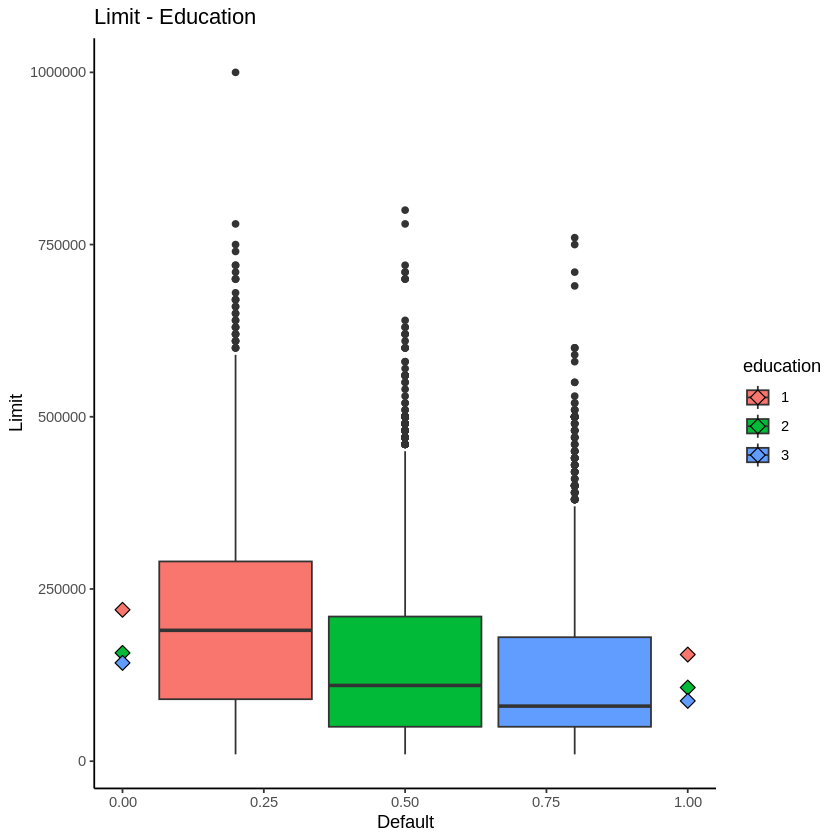

In [32]:
 # default-limit_bal-education
ggplot(train_data, aes(x = default, y = limit_bal, fill = education)) +
  geom_boxplot()+
  labs(title="Limit - Education",x="Default", y = "Limit")+
  stat_summary(fun = mean, geom = "point", shape = 23, size = 3) +
  theme_classic()

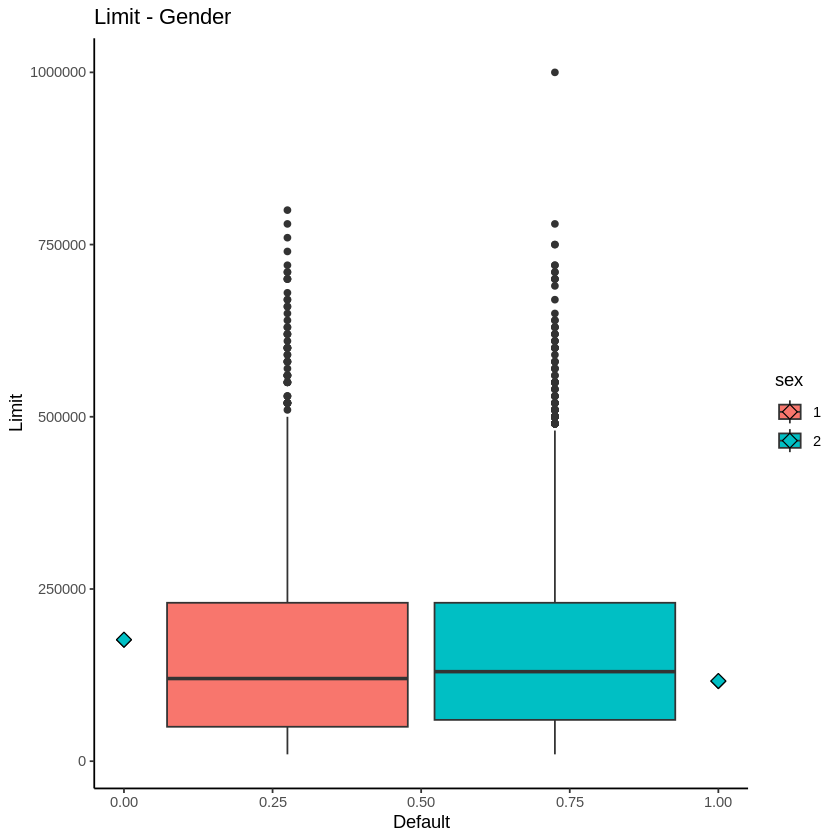

In [33]:
 # default-limit_bal-sex
ggplot(train_data, aes(x = default, y = limit_bal, fill = sex)) +
  geom_boxplot()+
  labs(title="Limit - Gender",x="Default", y = "Limit")+
  stat_summary(fun = mean, geom = "point", shape = 23, size = 3) +
  theme_classic()

In [34]:
 # test štatistickej významnosti limit_bal
t.test(limit_bal ~ default, data = train_data)


	Welch Two Sample t-test

data:  limit_bal by default
t = 27.379, df = 6821.1, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 55727.56 64323.20
sample estimates:
mean in group 0 mean in group 1 
       176349.0        116323.6 


Z boxplotov vypadá byť najvýraznejšia závislosť v poslednej uvedenej numerickej premennej `limit_bal`, kde je hodnota limitu značne vyššia pre odozvu `default = 0`, teda schopnosť splácania úveru. To sa potvrdzuje aj p-hodnotou t-testu, ktorá je v prípade `limit_bal` výrazne pod hôadinou významnosti. Limit teda má podľa t-testu významný vplyv na odozvu. Navyše v kombinácii s informáciou z boxplotov môžeme vyvodiť, že schopnosť splácať úver je horšia u klientov s nižšou hodnotou limitu.

## 02 - Logistická regrese agregovaná tabulková data

použijte `data_table`





* Vytvořte odezvu pro logistický model binomického rozdělení a sestrojte nulový model. Jaká je ve zkoumané populaci  průměrná šance na neschopnost splácet úvěr  a jaká je pravděpodobnost nesplacení úvěru? (Pozri P9 príklad brouci + časť Null model v cv. 7)

* Sestrojte model, kde závisí výskyt nesplacení úvěru pouze na proměnné `limit_bal`. Je vliv limitu významná proměnná na hladině významnosti 0.05? Pokud ano, zjistěte, kolikrát mají lidé s limitem větším než 100 vetší šanci na neschopnost splácet než lidé s limitem nad 200. (Pozri časť Model with varaible: sex/class v cv. 7 ... podľa počtu úrovní, resp. Model with continuous independent variable, pokiaľ sa jedná o spojitú premennú)

* Sestrojte model, kde závisí výskyt neschopnosti splácet pouze na věku `age`.  Je věk  statisticky významná proměnná na hladině významnosti 0.01? Pokud ano, zjistěte, kolikrát mají pacienti ve věku mezi 35-40 menší šanci na  neschopnost splácet než lidé ve věku 20-25.

* Předpokládejte, že šance na neschopnost splácet roste exponenciálně s hodnotou limitu a klesá exponenciálně s věkem. Vytvořte příslušné numerické spojité prediktory. Sestrojte model, kde šance na neschopnost splácet bude záležet na numerických hodnotách tlaku a věku (bez interakce). Jaký je poměr šancí na neschopnost splácet mezi lidmi lišícími se limitem o 50000 a majícími stejný věk?

* Otestujte předešlý model proti saturovanému modelu. Má tento test opodstatnění? Okomentujte jeho výsledek.

In [35]:
data_table$default_no
data_table$default_yes

[1] 444 710  94 439  43 213  21  96  18 119 363 360 274 498 254 451 218 433 466
[20] 941 259 237 174 271 155 282 175 298 567 897 239 197 129 232 146 217 148 231
[39] 487 722 566 559 267 429 213 312 237 324 758 885

[1] 210 326  23 146  12  46   5  16   5  23 173 176 118 173  64 103  38  78  43
[20] 124 128 112  75  97  55  66  45  54  75 117 126 102  68  88  51  53  56  41
[39]  79  90 272 286 104 166  89  80  66  56 148 128

In [36]:
## NULOVÝ MODEL
 # naladenie binomického modelu možné dvoma spôsobmi:
YN = cbind(data_table$default_yes, data_table$default_no)             # zadáme počty úspechov a neúspechov ako jednu premennú
mod0_1 = glm(YN ~ 1, family = binomial(link = "logit"), data_table)   # model
summary(mod0_1)

 # alebo zadáme relatívnu úspešnosť a veľkosť vzorky
mod0_2 = glm(default_yes/(default_yes + default_no) ~ 1, family = binomial(link = "logit"), weights = default_yes + default_no, data_table)

 # v oboch prípadoch dostaneme rovnaký model
coef(mod0_1) == coef(mod0_2)


Call:
glm(formula = YN ~ 1, family = binomial(link = "logit"), data = data_table)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.25309    0.01624  -77.16   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 950.91  on 49  degrees of freedom
Residual deviance: 950.91  on 49  degrees of freedom
AIC: 1246.3

Number of Fisher Scoring iterations: 4


(Intercept) 
       TRUE

In [37]:
 # priemerná šanca pre neschopnosť splácať úver
exp(coef(mod0_1))

 # pravdepodobnosť nesplatenia úveru
exp(coef(mod0_1))/(1 + exp(coef(mod0_1)))

(Intercept) 
  0.2856222

(Intercept) 
  0.2221665

In [38]:
## MODEL S PREMENNOU limit_bal
mod_limit = glm(YN ~ limit_bal, family = binomial(link = "logit"), data_table)
summary(mod_limit)


Call:
glm(formula = YN ~ limit_bal, family = binomial(link = "logit"), 
    data = data_table)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.72203    0.02788 -25.895  < 2e-16 ***
limit_bal100 -0.25371    0.04560  -5.564 2.63e-08 ***
limit_bal150 -0.58442    0.05320 -10.985  < 2e-16 ***
limit_bal200 -0.84521    0.05860 -14.424  < 2e-16 ***
limit_bal250 -1.23004    0.04637 -26.527  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 950.907  on 49  degrees of freedom
Residual deviance:  92.278  on 45  degrees of freedom
AIC: 395.71

Number of Fisher Scoring iterations: 4


Z výstupu funkcie summary vidíme, že p-hodnoty všetkých koeficientov sú hlboko pod hladinou významnosti 0.05.

Skúmajme ďalej pomer šancí na nesplatenie u klientov s limitom nad 200 tisíc oproti klientom s nižším limitom 100 tisíc.

In [39]:
 # Koľkokrát majú ľudia s limitom väčším než 100 tisíc väčšiu šancu na nesplatenie než ľudia s limitom nad 200 tisíc?
is.factor(data_table$limit_bal)
levels(data_table$limit_bal)

[1] TRUE

[1] "50"  "100" "150" "200" "250"

Jedná sa o kategorickú premennú. Ako referenčná je však zvolená úroveň 50. Keď chceme zistiť pomer šancí oproti klientom s limitom nad 200 tisíc, musíme za referenčnú zvoliť úroveň limitu 200.

In [40]:
mod_limit_200 = glm(YN ~ relevel(factor(limit_bal), ref = "200"), family = binomial(link = "logit"), data_table)
summary(mod_limit_200)


Call:
glm(formula = YN ~ relevel(factor(limit_bal), ref = "200"), family = binomial(link = "logit"), 
    data = data_table)

Coefficients:
                                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                                -1.56724    0.05154 -30.409  < 2e-16
relevel(factor(limit_bal), ref = "200")50   0.84521    0.05860  14.424  < 2e-16
relevel(factor(limit_bal), ref = "200")100  0.59151    0.06291   9.402  < 2e-16
relevel(factor(limit_bal), ref = "200")150  0.26079    0.06862   3.800 0.000145
relevel(factor(limit_bal), ref = "200")250 -0.38483    0.06347  -6.063 1.34e-09
                                              
(Intercept)                                ***
relevel(factor(limit_bal), ref = "200")50  ***
relevel(factor(limit_bal), ref = "200")100 ***
relevel(factor(limit_bal), ref = "200")150 ***
relevel(factor(limit_bal), ref = "200")250 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for bin

In [41]:
 # pomer šancí
exp(0.59151)

[1] 1.806714

Klienti s limitom nad 100 tisíc majú teda 1.8-krát väčšiu šancu na nesplatenie úveru oproti klientom, ktorých limit presahuje 200 tisíc.

In [42]:
## MODEL S PREMENNOU age
mod_age = glm(YN ~ age, family = binomial(link = "logit"), data_table)
summary(mod_age)


Call:
glm(formula = YN ~ age, family = binomial(link = "logit"), data = data_table)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.99535    0.04107 -24.236  < 2e-16 ***
age25       -0.36727    0.05328  -6.893 5.46e-12 ***
age30       -0.39669    0.05659  -7.011 2.37e-12 ***
age35       -0.29789    0.05811  -5.126 2.96e-07 ***
age40       -0.18689    0.05122  -3.649 0.000263 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 950.91  on 49  degrees of freedom
Residual deviance: 883.12  on 45  degrees of freedom
AIC: 1186.6

Number of Fisher Scoring iterations: 4


Opäť sa všetky koeficienty javia ako štatisticky významné a to a to aj na hladine 0.01. Pristúpme preto k pomeru šancí.

In [43]:
 # Koľkokrát majú klienti vo veku 35-40 menšiu šancu splácať oproti klientom vo veku 20-25?
levels(data_table$age)

exp(-0.29789)

[1] "20" "25" "30" "35" "40"

[1] 0.742383

Klienti vo veku 20-25 rokov už sú zahrnutí v referenčnej kategórii, nie je preto potreba model nijak updatovať. Vidíme, že oproti klientom vo veku 20-25 rokov klesá u starších klientov v rokoch 35-40 šanca na nesplatenie úveru 0.74-krát. Ich šanca na nesplatenie úveru je teda oproti mladším klientom nižšia.

In [44]:
## MODEL SO SPOJITÝMI PREMENNÝMI
data_con <- data %>%
   dplyr::select(default, age, sex, education, marriage, limit_bal) %>%
   mutate(default = as.factor(default),
            limit_bal = limit_bal/1000)

#data_con %>% head()
str(data_con)

tibble [21,943 × 6] (S3: tbl_df/tbl/data.frame)
 $ default  : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 1 ...
 $ age      : num [1:21943] 26 34 37 57 37 29 28 34 51 41 ...
 $ sex      : Factor w/ 2 levels "1","2": 2 2 2 1 1 1 2 2 2 2 ...
 $ education: Factor w/ 3 levels "1","2","3": 2 2 2 2 1 1 3 3 1 2 ...
 $ marriage : Factor w/ 2 levels "1","2": 2 2 1 1 2 2 1 2 2 2 ...
 $ limit_bal: num [1:21943] 120 90 50 50 50 500 140 200 260 630 ...


In [45]:
 # model
mod_con = glm(default ~ age + limit_bal, family = binomial(link = "logit"), data_con)

summary(mod_con)
#anova(mod_con, test = "Chisq")


Call:
glm(formula = default ~ age + limit_bal, family = binomial(link = "logit"), 
    data = data_con)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.8775064  0.0647447 -13.553  < 2e-16 ***
age          0.0069268  0.0017461   3.967 7.28e-05 ***
limit_bal   -0.0043160  0.0001594 -27.083  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 23244  on 21942  degrees of freedom
Residual deviance: 22362  on 21940  degrees of freedom
AIC: 22368

Number of Fisher Scoring iterations: 4


In [46]:
 # pomer šancí
exp(50*coef(mod_con)[3])

limit_bal 
0.8058962

S nárastom limitu o 50 000 klesá šanca na nesplatenie úveru u klientov rovnakého veku 0.8-krát.

In [47]:
## SATUROVANÝ MODEL
colnames(data_con)

[1] "default"   "age"       "sex"       "education" "marriage"  "limit_bal"

In [48]:
mod_sat = glm(default ~ age*sex*education*marriage*limit_bal, family = binomial(link = "logit"), data_con)
summary(mod_sat)


Call:
glm(formula = default ~ age * sex * education * marriage * limit_bal, 
    family = binomial(link = "logit"), data = data_con)

Coefficients:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                              2.403e-01  7.168e-01   0.335   0.7374
age                                     -1.642e-02  1.668e-02  -0.984   0.3251
sex2                                    -1.230e+00  1.014e+00  -1.213   0.2250
education2                              -4.160e-01  8.195e-01  -0.508   0.6117
education3                              -2.848e-01  9.312e-01  -0.306   0.7597
marriage2                               -6.059e-01  8.289e-01  -0.731   0.4647
limit_bal                               -6.450e-03  2.791e-03  -2.311   0.0208
age:sex2                                 2.799e-02  2.504e-02   1.118   0.2636
age:education2                           1.111e-02  1.923e-02   0.578   0.5634
age:education3                           7.237e-03  2.120e-02

In [49]:
 # porovnanie so saturovaným modelom na základe AIC
AIC(mod_con)
AIC(mod_sat)

[1] 22368.38

[1] 22326.92

Porovnávanie so saturovaným modelom by malo zmysel iba v prípade, kedy by sme `age` a `limit_bal` faktorizovali do fixného počtu úrovní. Potom aj pre počet pozorovaní rastúci nadovšetky medze zostáva počet úrovní fixný.

Vytvorme teda nový model s faktorizovanými premennými.

In [50]:
 # faktorizácia age a limit_bal do pevného počtu úrovní
data_dis <- data %>%
   dplyr::select(default,age, sex, education, marriage, limit_bal) %>%
   mutate(age             = cut(age, breaks=c(-Inf, 25,30,35,40,Inf),labels=c("20","25","30","35","40")),
          limit_bal  = cut(limit_bal, breaks=c(-Inf,50000, 100000,150000,200000,Inf),labels=c("50","100","150","200","250")),
          default = factor(default))

str(data_dis)

tibble [21,943 × 6] (S3: tbl_df/tbl/data.frame)
 $ default  : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 1 ...
 $ age      : Factor w/ 5 levels "20","25","30",..: 2 3 4 5 4 2 2 3 5 5 ...
 $ sex      : Factor w/ 2 levels "1","2": 2 2 2 1 1 1 2 2 2 2 ...
 $ education: Factor w/ 3 levels "1","2","3": 2 2 2 2 1 1 3 3 1 2 ...
 $ marriage : Factor w/ 2 levels "1","2": 2 2 1 1 2 2 1 2 2 2 ...
 $ limit_bal: Factor w/ 5 levels "50","100","150",..: 3 2 1 1 1 5 3 4 5 5 ...


In [51]:
 # model s faktorovými premennými
mod_dis = glm(default ~ age + limit_bal, family = binomial(link = "logit"), data_dis)
summary(mod_dis)


Call:
glm(formula = default ~ age + limit_bal, family = binomial(link = "logit"), 
    data = data_dis)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.794642   0.043872 -18.113  < 2e-16 ***
age25         0.003326   0.055596   0.060  0.95230    
age30         0.067425   0.059487   1.133  0.25703    
age35         0.157711   0.060969   2.587  0.00969 ** 
age40         0.155244   0.053079   2.925  0.00345 ** 
limit_bal100 -0.253788   0.046002  -5.517 3.45e-08 ***
limit_bal150 -0.589578   0.054063 -10.905  < 2e-16 ***
limit_bal200 -0.858412   0.059790 -14.357  < 2e-16 ***
limit_bal250 -1.253477   0.048193 -26.010  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 23244  on 21942  degrees of freedom
Residual deviance: 22367  on 21934  degrees of freedom
AIC: 22385

Number of Fisher Scoring iterations: 4


In [52]:
 # saturovaný model s faktorovými premennými
mod_dis_sat = glm(default ~ age*sex*education*marriage*limit_bal, family = binomial(link = "logit"), data_dis)
summary(mod_dis_sat)


Call:
glm(formula = default ~ age * sex * education * marriage * limit_bal, 
    family = binomial(link = "logit"), data = data_dis)

Coefficients: (8 not defined because of singularities)
                                               Estimate Std. Error z value
(Intercept)                                    -1.09861    1.15470  -0.951
age25                                           1.79176    1.44338   1.241
age30                                           0.69315    1.24164   0.558
age35                                           0.14310    1.26896   0.113
age40                                           0.10821    1.19951   0.090
sex2                                            0.51083    1.28236   0.398
education2                                      0.69315    1.22474   0.566
education3                                      1.09861    1.41421   0.777
marriage2                                       0.26768    1.16874   0.229
limit_bal100                                   15.66468  882

In [53]:
 # porovnanie na základe AIC
AIC(mod_dis)
AIC(mod_dis_sat)

AIC(mod_dis) < AIC(mod_dis_sat)

[1] 22385.35

[1] 22573.15

[1] TRUE

V prípade faktorizovaných premenných má model s premennými `age` a `limit_bal` nižšiu hodnotu Akaikeho informačného kritéria ako model saturovaný. Na základe tohto kritéria je teda vhodnejšie voliť prvý model.

## 03 - Poissonovská regrese na agregovaná tabulková data (4/7)

použijte  `data_table`


* Upravte tabulku do potřebného formátu a sestrojte čistě aditivní loglineární model pro četnosti pozorování ve skupinách, který předpokládá vzájemnou
nezávislost mezi všemi skupinovými prediktory.

* Na základě předchozího modelu, jaký je odhad šance na neschopnost splácet mezi všemi vybranými lidmi ve skupině a jaký je odhad pravděpodobnosti neschopnosti splácet?

* Sestavte model, který obsahuje všechny možné dvojné interakce mezi klasifikačními veličinami a porovnejte tento model s předchozím modelem bez interakcí. Je tento model statisticky významně lepší?

* Sestavte saturovaný model. Je tento model statisticky významně lepší než předchozí s dvojtými interakcemi? Vyberte model který je podle vás nejlepší.

* Na základě vybraného modelu, je ve všech věkových skupinách stejná souvislost mezi limitem a šancí splácet?

* Na základě vybraného modelu, je pro obě pohlaví stejná souvislost mezi limitem a šancí splácet?

* Ve skupině co se týče vzdělání je nějvětší souvislost mezi schopností splácet a limitem?


In [54]:
head(data_table)

age,limit_bal,sex,default_yes,default_no
<fct>,<fct>,<fct>,<dbl>,<dbl>
20,50,1,210,444
20,50,2,326,710
20,100,1,23,94
20,100,2,146,439
20,150,1,12,43
20,150,2,46,213


In [55]:
tab<-data_table[rep(1:nrow(data_table),1,each=2),]
tab$defl<-1
tab$freq<-tab$default_yes
for (i in 1:nrow(tab)){
  if (i%%2==0) {
      tab$defl[i]<-0
      tab$freq[i]<-tab$default_no[i]
}
}
tab$defl<-as.factor(tab$defl)

tab<-tab[, c('defl','age','limit_bal','sex','freq')]

In [57]:
head(tab)

defl,age,limit_bal,sex,freq
<fct>,<fct>,<fct>,<fct>,<dbl>
1,20,50,1,210
0,20,50,1,444
1,20,50,2,326
0,20,50,2,710
1,20,100,1,23
0,20,100,1,94


čistě aditivní loglineární model

In [58]:
mdl <- glm(freq ~ limit_bal + age + sex + defl,data=tab, family=poisson(link="log"))
  summary(mdl)


Call:
glm(formula = freq ~ limit_bal + age + sex + defl, family = poisson(link = "log"), 
    data = tab)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   5.52644    0.02320 238.178  < 2e-16 ***
limit_bal100 -0.41362    0.02073 -19.951  < 2e-16 ***
limit_bal150 -0.69915    0.02270 -30.799  < 2e-16 ***
limit_bal200 -0.79632    0.02346 -33.942  < 2e-16 ***
limit_bal250  0.13533    0.01790   7.559 4.07e-14 ***
age25         0.57511    0.02279  25.237  < 2e-16 ***
age30         0.31885    0.02396  13.309  < 2e-16 ***
age35         0.15173    0.02486   6.104 1.04e-09 ***
age40         0.68094    0.02237  30.436  < 2e-16 ***
sex2          0.39299    0.01376  28.554  < 2e-16 ***
defl1        -1.25309    0.01624 -77.163  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 16558.0  on 99  degrees of freedom
Residual deviance:  4233.6  on 89  degrees of freed

In [59]:
mdl_result<- c(deviance(mdl),df.residual(mdl))
pchisq(q = mdl_result[1], df = mdl_result[2], lower.tail = F)
#1-pchisq(q = mdl_result[1], df = mdl_result[2], lower.tail = F)
#vyjde p-hodnota <0.05...zamietame hypotezu ze su vzajomne nezavisle

[1] 0



*   Na základě předchozího modelu, jaký je odhad šance na neschopnost splácet mezi všemi vybranými lidmi ve skupině a jaký je odhad pravděpodobnosti neschopnosti splácet?



In [60]:
odds_pay_vs_nopay=exp(coef(mdl)["defl1"])
odds_pay_vs_nopay
probability_pay <- (odds_pay_vs_nopay)/(1+odds_pay_vs_nopay)
probability_pay



probability_n_pay = 1-probability_pay
probability_n_pay


defl1 
0.2856222

defl1 
0.2221665

defl1 
0.7778335

In [61]:
odds_nopay_vs_pay=exp(-coef(mdl)["defl1"])
#odds_nopay_vs_pay
probability_notpay <- (odds_nopay_vs_pay)/(1+odds_nopay_vs_pay)
#probability_notpay

cat("Šanca na neschopnosť splácať:", odds_nopay_vs_pay, "\n")
cat("Pravdepodobnost neschopnosti splácať:", probability_notpay, "\n")

Šanca na neschopnosť splácať: 3.501128 
Pravdepodobnost neschopnosti splácať: 0.7778335 


Šanca že klient bude neschopný splácať je podľa tohto modelu 3.5x vyššia než naopak. Pravdepohobnosť nesplatiteľa je 77,78%



*  Sestavte model, který obsahuje všechny možné dvojné interakce mezi klasifikačními veličinami a porovnejte tento model s předchozím modelem bez interakcí. Je tento model statisticky významně lepší?



In [62]:
mdl_interactions <- glm(freq ~.^2,data=tab, family=poisson(link="log"))
summary(mdl_interactions)


Call:
glm(formula = freq ~ .^2, family = poisson(link = "log"), data = tab)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         5.96103    0.04042 147.472  < 2e-16 ***
defl1              -0.71282    0.04900 -14.549  < 2e-16 ***
age25              -0.10597    0.05305  -1.997 0.045772 *  
age30              -0.42112    0.05764  -7.306 2.75e-13 ***
age35              -0.51121    0.05937  -8.610  < 2e-16 ***
age40               0.43663    0.04876   8.955  < 2e-16 ***
limit_bal100       -1.25896    0.05749 -21.898  < 2e-16 ***
limit_bal150       -1.91578    0.07253 -26.414  < 2e-16 ***
limit_bal200       -2.68499    0.09708 -27.657  < 2e-16 ***
limit_bal250       -2.43211    0.08736 -27.841  < 2e-16 ***
sex2                0.69370    0.04393  15.791  < 2e-16 ***
defl1:age25        -0.01347    0.05580  -0.241 0.809171    
defl1:age30         0.04576    0.05979   0.765 0.444082    
defl1:age35         0.13323    0.06134   2.172 0.029851 *  
defl1:ag

ANOVA pre oba modely

In [63]:
anova(mdl,mdl_interactions,test="Chisq")
cat('AIC dvojne interakcie: ',AIC(mdl_interactions),'\n')
cat('AIC jednoduchy model: ',AIC(mdl),'\n')
cat('BIC dvojne interakcie: ',BIC(mdl_interactions),'\n')
cat('BIC jednoduchy model: ',BIC(mdl),'\n')
cat('D dvojne interakcie: ',deviance(mdl_interactions),'\n')
cat('D jednoduchy model: ',deviance(mdl),'\n')

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,89,4233.5569,NA,NA,NA
2,56,168.1518,33,4065.405,0


AIC dvojne interakcie:  933.2372 
AIC jednoduchy model:  4932.642 
BIC dvojne interakcie:  1047.865 
BIC jednoduchy model:  4961.299 
D dvojne interakcie:  168.1518 
D jednoduchy model:  4233.557 


Modely medzi sebou porovnávame prostredníctvom ANOVA testu. P-hodnota testu vyšla 0 (s presnosťou danou R a colabom) a teda zamietame nulovú hypotézu v prospech alternatívy a teda, že pridané premenné majú významne odlišné koeficienty od nuly a rozžírený model teda lepšie popisuje dáta.

Ďalej je vidieť, že hodnoty kritérií AIC, BIC a Deviačnej štatistiky sú významne nižšie pre model s interakciami.

Na základe týchto poznatkov môžeme model s dvojnými interakciami považovať za lepší oproti jednoduchému modelu.



*   Sestavte saturovaný model. Je tento model statisticky významně lepší než předchozí s dvojtými interakcemi? Vyberte model který je podle vás nejlepší.



In [64]:
mdl_sat <- glm(freq ~limit_bal*age * sex * defl,data=tab, family=poisson(link="log"))

summary(mdl_sat)


Call:
glm(formula = freq ~ limit_bal * age * sex * defl, family = poisson(link = "log"), 
    data = tab)

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    6.095825   0.047458 128.447  < 2e-16 ***
limit_bal100                  -1.552530   0.113537 -13.674  < 2e-16 ***
limit_bal150                  -2.334624   0.159712 -14.618  < 2e-16 ***
limit_bal200                  -3.051302   0.223319 -13.663  < 2e-16 ***
limit_bal250                  -3.205453   0.240433 -13.332  < 2e-16 ***
age25                         -0.201422   0.070761  -2.847 0.004420 ** 
age30                         -0.538997   0.078187  -6.894 5.44e-12 ***
age35                         -0.619361   0.080227  -7.720 1.16e-14 ***
age40                          0.242770   0.063396   3.829 0.000128 ***
sex2                           0.469440   0.060504   7.759 8.57e-15 ***
defl1                         -0.748717   0.083751  -8.940  < 2e-16 ***
limit_bal100:a

In [65]:
#tibble(coef=names(coef(mdl_sat)), coef_value=coef(mdl_sat), exp_coef_value=exp(coef(mdl_sat)))

V summary saturovaného modelu vidíme, že trojné interakcie už nie sú štatisticky významné, navyše ich pridanie penalizuje aj niektoré rádovo nižšie. Porovnáme predošlý model s dvojnými interakciami a saturovaný model pomocou ANOVA testu:

In [66]:
anova(mdl_interactions,mdl_sat,test="Chisq")
cat('AIC saturovany model: ',AIC(mdl_sat),'\n')
cat('AIC dvojne interakcie: ',AIC(mdl_interactions),'\n')
cat('BIC saturovany model: ',BIC(mdl_sat),'\n')
cat('BIC dvojne interakcie: ',BIC(mdl_interactions),'\n')
cat('D saturovany model: ',deviance(mdl_sat),'\n')
cat('D dvojne interakcie: ',deviance(mdl_interactions),'\n')

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,56,1.681518e+02,NA,NA,NA
2,0,4.374279e-13,56,168.1518,3.804102e-13


AIC saturovany model:  877.0854 
AIC dvojne interakcie:  933.2372 
BIC saturovany model:  1137.602 
BIC dvojne interakcie:  1047.865 
D saturovany model:  4.374279e-13 
D dvojne interakcie:  168.1518 


Podľa ANOVY, kedy p-val $3.08 \times 10^{-13}<\alpha$ je saturovaný model lepší, AIC kritérium vychádza nižšie.

BIC je pre saturovaný model vyššie.

Tým, že štvorné interakcie sú štatisticky nevýznamné a model je značne komplikovaný, spravíme ešte model s trojnými interakciami.

In [67]:
mdl_interactions3 <- glm(freq ~.^3,data=tab, family=poisson(link="log"))
summary(mdl_interactions3)


Call:
glm(formula = freq ~ .^3, family = poisson(link = "log"), data = tab)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               6.109183   0.046086 132.561  < 2e-16 ***
defl1                    -0.790920   0.078178 -10.117  < 2e-16 ***
age25                    -0.196451   0.067320  -2.918 0.003521 ** 
age30                    -0.547728   0.074410  -7.361 1.83e-13 ***
age35                    -0.652879   0.076884  -8.492  < 2e-16 ***
age40                     0.213173   0.061093   3.489 0.000484 ***
limit_bal100             -1.640603   0.106069 -15.467  < 2e-16 ***
limit_bal150             -2.353991   0.146398 -16.079  < 2e-16 ***
limit_bal200             -3.060560   0.206459 -14.824  < 2e-16 ***
limit_bal250             -3.166440   0.216441 -14.630  < 2e-16 ***
sex2                      0.447637   0.058122   7.702 1.34e-14 ***
defl1:age25              -0.008108   0.108405  -0.075 0.940375    
defl1:age30               0.072069   

In [68]:
anova(mdl_interactions3,mdl_sat,test="Chisq")
cat('AIC saturovany model: ',AIC(mdl_sat),'\n')
cat('AIC trojne interakcie: ',AIC(mdl_interactions3),'\n')
cat('BIC saturovany model: ',BIC(mdl_sat),'\n')
cat('BIC trojne interakcie: ',BIC(mdl_interactions3),'\n')
cat('D saturovany model: ',deviance(mdl_sat),'\n')
cat('D trojne interakcie: ',deviance(mdl_interactions3),'\n')

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,16,1.839182e+01,NA,NA,NA
2,0,4.374279e-13,16,18.39182,0.301457


AIC saturovany model:  877.0854 
AIC trojne interakcie:  863.4772 
BIC saturovany model:  1137.602 
BIC trojne interakcie:  1082.312 
D saturovany model:  4.374279e-13 
D trojne interakcie:  18.39182 


Podľa ANOVA testov je model s trojnými interakciami lepší než s dvojnými a nie je horší než saturovaný. AIC a BIC hodnoty pre trojné interakcie sú najnižšie a teda model s trojnými je zpomedzi zostavených modelov najlepší.

In [69]:
anova(mdl_interactions,mdl_interactions3,test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,56,168.15180,NA,NA,NA
2,16,18.39182,40,149.76,1.35669e-14


*   Na základě vybraného modelu, je ve všech věkových skupinách stejná souvislost mezi limitem a šancí splácet?




Či je súvislosť medzi limitom a schopnosťou splácať vo všetkých vekových skupinách rovnaká budeme skúmať vymazaním všetkých interakcie medzi vekom, limitom a schopnosťou splácať v trojinterakčnom modeli a následným testovaním, hypotézy, že model dobre popisuje dáta.

In [70]:
mdl_lim_defl<-glm(freq~.^3 #-limit_bal:defl
                   # -age
                   # -age:defl
                   # -age:limit_bal
                   # -age:sex
                    -age:limit_bal:defl,
                   # -age:limit_bal:sex
                   # -age:sex:defl,
                    data=tab, family=poisson(link="log"))

In [71]:
summary(mdl_lim_defl)


Call:
glm(formula = freq ~ .^3 - age:limit_bal:defl, family = poisson(link = "log"), 
    data = tab)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)              6.11347    0.04558 134.116  < 2e-16 ***
defl1                   -0.80471    0.07581 -10.615  < 2e-16 ***
age25                   -0.17925    0.06511  -2.753 0.005903 ** 
age30                   -0.54969    0.07144  -7.695 1.42e-14 ***
age35                   -0.66100    0.07337  -9.009  < 2e-16 ***
age40                    0.19138    0.05973   3.204 0.001356 ** 
limit_bal100            -1.67446    0.10254 -16.330  < 2e-16 ***
limit_bal150            -2.37267    0.14192 -16.719  < 2e-16 ***
limit_bal200            -3.06814    0.20097 -15.267  < 2e-16 ***
limit_bal250            -3.10487    0.21286 -14.586  < 2e-16 ***
sex2                     0.44855    0.05783   7.757 8.70e-15 ***
defl1:age25             -0.06528    0.09580  -0.681 0.495590    
defl1:age30              0.07876    0

In [72]:
mdl_result<- c(deviance(mdl_lim_defl),df.residual(mdl_lim_defl))
pchisq(q = mdl_result[1], df = mdl_result[2], lower.tail = F)


mdl3_result<- c(deviance(mdl_interactions3),df.residual(mdl_interactions3))
pchisq(q = mdl3_result[1], df = mdl3_result[2], lower.tail = F)

[1] 0.2561433

[1] 0.301457

Nový model bez interakcií medzi limitom a schopnosťou splácať podľa χ$^2$ testu ($p-val=0.26>\alpha)$ nezamietame hypotézu, že model dobre popisuje dáta a ANOVA test poukazuje že model bez interakcie nie je horší ako s interakciou.

Interakcia nie je teda v modeli významná, a teda zamietame hypotézu o súvislosti medzi limitom,šancou splácať a vekovými skupinami.(tj- súvislosť limitu a šance nie je odlišná vrámci veku)


In [73]:
anova(mdl_lim_defl,mdl_interactions3,test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,32,36.80384,NA,NA,NA
2,16,18.39182,16,18.41202,0.3003281


*   Na základě vybraného modelu, je pro obě pohlaví stejná souvislost mezi limitem a šancí splácet?

In [75]:
mdl_lim_defl_sx<-glm(freq~.^3 #-limit_bal:defl
                    -sex:limit_bal:defl,
                    data=tab, family=poisson(link="log"))

In [76]:
summary(mdl_lim_defl_sx)



Call:
glm(formula = freq ~ .^3 - sex:limit_bal:defl, family = poisson(link = "log"), 
    data = tab)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               6.099298   0.046166 132.118  < 2e-16 ***
defl1                    -0.759574   0.076991  -9.866  < 2e-16 ***
age25                    -0.209511   0.067712  -3.094 0.001974 ** 
age30                    -0.560361   0.074857  -7.486 7.11e-14 ***
age35                    -0.665937   0.077375  -8.607  < 2e-16 ***
age40                     0.202814   0.061360   3.305 0.000949 ***
limit_bal100             -1.614929   0.103983 -15.531  < 2e-16 ***
limit_bal150             -2.297998   0.144001 -15.958  < 2e-16 ***
limit_bal200             -3.007754   0.204041 -14.741  < 2e-16 ***
limit_bal250             -3.151511   0.215788 -14.605  < 2e-16 ***
sex2                      0.463789   0.057928   8.006 1.18e-15 ***
defl1:age25               0.032695   0.107069   0.305 0.760088    
defl1:age30

In [77]:
mdl_result<- c(deviance(mdl_lim_defl_sx),df.residual(mdl_lim_defl_sx))
pchisq(q = mdl_result[1], df = mdl_result[2], lower.tail = F)

[1] 0.03507216

Nový model bez interakcií medzi pohlavím,limitom a schopnosťou splácať podľa χ$^2$ testu ($p-val=0.035<\alpha)$ zamietame hypotézu, že model dobre popisuje dáta a ANOVA test poukazuje že model bez interakcie je horší ako s interakciou.

Interakcia je teda v modeli významná, a teda nezamietame hypotézu o súvislosti medzi limitom,šancou splácať a pohlavím. (tj- súvislosť limitu a šance se odlišná vrámci pohlaví)

In [78]:
anova(mdl_lim_defl_sx,mdl_interactions3,test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20,32.84653,NA,NA,NA
2,16,18.39182,4,14.4547,0.005976692


*   Ve skupině co se týče vzdělání je nějvětší souvislost mezi schopností splácet a limitem?



`data_table` neobsahuje premennú education.

Vytvoríme si teda `data_table2` a rovno použijeme v konzistencii s predošlou analýzou trojinterakčný model.

In [80]:
head(data)

limit_bal,sex,education,marriage,age,pay_0,pay_6,default,bill_min,bill_max,pay_min,pay_max
<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
120000,2,2,2,26,-1,2,1,1725,3455,0,2000
90000,2,2,2,34,0,0,0,13559,29239,1000,5000
50000,2,2,1,37,0,0,0,28314,49291,1000,2019
50000,1,2,1,57,-1,0,0,5670,35835,679,36681
50000,1,1,2,37,0,0,0,19394,64400,657,2500
500000,1,1,2,29,0,0,0,367965,542653,13750,55000


In [81]:
data_table2 <- data %>%
   dplyr::select(default,age, sex, education, marriage, limit_bal) %>%
   mutate(age             = cut(age, breaks=c(-Inf, 25,30,35,40,Inf),labels=c("20","25","30","35","40")),
          ) %>%
 group_by(age,limit_bal,sex,education) %>%
  #group_by(limit_bal,sex,education) %>%
  summarise(n = n(),
         default_yes = sum(default),
         default_no = n - sum(default)
        ) %>%
  select(-c("n"))

data_table2 %>% head()

`summarise()` has grouped output by 'age', 'limit_bal', 'sex'. You can override
using the `.groups` argument.


age,limit_bal,sex,education,default_yes,default_no
<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
20,10000,1,1,6,8
20,10000,1,2,23,24
20,10000,1,3,2,17
20,10000,2,1,3,11
20,10000,2,2,10,21
20,10000,2,3,1,3


In [82]:
#summary(data_table2)

In [83]:
tab2<-data_table2[rep(1:nrow(data_table2),1,each=2),]
tab2$defl<-1
tab2$freq<-tab2$default_yes
for (i in 1:nrow(tab)){
  if (i%%2==0) {
      tab2$defl[i]<-0
      tab2$freq[i]<-tab2$default_no[i]
}
}
tab2$defl<-as.factor(tab2$defl)
tab2<-tab2[, c('defl','age','limit_bal','sex','education','freq')]
#tab2<-tab2[, c('defl','limit_bal','sex','education','freq')]
head(tab2)

defl,age,limit_bal,sex,education,freq
<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>
1,20,10000,1,1,6
0,20,10000,1,1,8
1,20,10000,1,2,23
0,20,10000,1,2,24
1,20,10000,1,3,2
0,20,10000,1,3,17


In [84]:
mdl_t2_interactions3 <- glm(freq ~#.^2
defl+	age +limit_bal	+sex	+education
                            +education*defl*limit_bal,
                            data=tab2,family=poisson(link="log"))
summary(mdl_t2_interactions3)


Call:
glm(formula = freq ~ defl + age + limit_bal + sex + education + 
    education * defl * limit_bal, family = poisson(link = "log"), 
    data = tab2)

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 3.352e+00  9.810e-02  34.173  < 2e-16 ***
defl1                      -1.744e+00  1.067e-01 -16.351  < 2e-16 ***
age25                       4.119e-01  3.869e-02  10.647  < 2e-16 ***
age30                       1.112e-01  4.056e-02   2.742  0.00611 ** 
age35                       2.986e-02  4.125e-02   0.724  0.46915    
age40                       5.940e-01  3.738e-02  15.892  < 2e-16 ***
limit_bal                  -3.773e-06  1.901e-06  -1.985  0.04716 *  
sex2                        2.721e-01  1.961e-02  13.874  < 2e-16 ***
education2                  7.544e-01  1.194e-01   6.321 2.60e-10 ***
education3                 -8.166e-01  1.808e-01  -4.515 6.32e-06 ***
defl1:education2            3.904e-01  1.254e-01   3.113  0

In [85]:
cfs=coefficients(mdl_t2_interactions3)
cfs


(Intercept)                      defl1 
              3.352203e+00              -1.744130e+00 
                     age25                      age30 
              4.118871e-01               1.112010e-01 
                     age35                      age40 
              2.985770e-02               5.940045e-01 
                 limit_bal                       sex2 
             -3.772908e-06               2.721179e-01 
                education2                 education3 
              7.544465e-01              -8.165598e-01 
          defl1:education2           defl1:education3 
              3.904422e-01               1.230782e+00 
      limit_bal:education2       limit_bal:education3 
             -2.545893e-06              -4.571646e-07 
           defl1:limit_bal defl1:limit_bal:education2 
             -1.458082e-06              -1.101686e-06 
defl1:limit_bal:education3 
             -5.125801e-06

In [86]:
e1=cfs['limit_bal']
e2=cfs['limit_bal']+cfs['limit_bal:education2']+cfs['defl1:limit_bal:education2']
e3=cfs['limit_bal']+cfs['limit_bal:education3']+cfs['defl1:limit_bal:education3']

In [87]:
e1
e2
e3

limit_bal 
-3.772908e-06

limit_bal 
-7.420487e-06

limit_bal 
-9.355874e-06

In [88]:
c(exp(e1),exp(e2),exp(e3))

limit_bal limit_bal limit_bal 
0.9999962 0.9999926 0.9999906

*Ve skupině co se týče vzdělání je nějvětší souvislost mezi schopností splácet a limitem?*

Otázka nie je rozhodne jednoznačne formulovaná, domnievam sa, že pôvodne mohla byť myslená ako:  "*V ktorej skupine, čo sa týka vzdelania je najvyššia súvislosť medzi limitom a schopnosťou splácať?*"

V `data_table` nie je premenn8 education, tak som vyrobila nový data frame s touto premennou. Ďalej s užitím education, bolo premenných čo sa týka interakcí priveľa, tak som pre ilustráciu zospojitila **limit_bal** a zostavila model len s interakciami spojenými s $education*defl*limit\_bal$.


Pre určenie najvyššej závislosti medzi limitom a splatiteľnosťou na základe skupín v dosiahnutom vzdelaní stanovíme smernice (slopes) závislostí pre jednotlivé skupiny na danej hodnote $limit\_bal=lb$.

* Pre **education1** sa jedná o $\beta_{limit\_bal}=-3.77290789652997 \times 10^{-6}$
* Pre **education2** : $\beta_{limit\_bal}+\beta_{limit\_bal:education2} +\beta_{limit\_bal:education2:defl1}=-7.42048651421928 \times 10^{-6}$
* Pre **education3** : $\beta_{limit\_bal}+\beta_{limit\_bal:education3} +\beta_{limit\_bal:education,:defl1}=-9.35587364779457 \times 10^{-6}$


Pričom sa pohybujeme v rádoch $10^{-6}$ a teda rozdiel je zanedbateľný



## 04 - Logistická regrese - statistika (5/8)

Nyní již používejte `data_train`

* Vypište kontingenční tabulku pro proměnné pohlaví (`sex`) a schopnost splácet  (`default`). Ručně z tabulky spočtěte empirický poměr šancí na schopnost splácet (muž vs. žena) a pravděpodobnost onemocnění pro ženu a muže. Výsledek porovnejte s výsledky z logistické regrese, kde jediným prediktorem bude právě proměnná `sex` a odezvou proměnná `default`. Pro poměr šancí uveďte i 95% konfidenční interval a okometujte, zdali mají ženy signifikantně menší šanci na schopnost splácet.

* Vypište kontingenční tabulku pro proměnné vzdělání (`education`) a schopnost splácet (`default`). Ručně z tabulky spočtěte empirický poměr šancí na onemocnění srdce (type 0: asymptomatic, proti ostatním) a pravděpodobnosti onemocnění pro jednotlivé typy. Výsledek porovnejte s výsledky z logistické regrese, kde jediným prediktorem bude právě proměnná `education` a odezvou proměnná `default`. Pro poměr šancí uveďte i 95% konfidenční interval a okometujte, zdali mají s lepším vzděláním mají menší šanci na neschopnost splácet úvěr.

* Sestavte model, kde použijete všechny dostupné proměnné (jak faktorové tak numerické). Pomocí deviančních testů model postupně redukujte. Výsledný model porovnejte s modelem, který byste obdrželi při použití automatického výběru s funkcí `step()`.

* Pro vybraný model spočtěte šanci na schopnost splácet pro muže oproti ženám, včetně 95% konfidenčních intervalů. Stejně tak pro manželství a vzdělání. Jak se výsledek změnil oproti jednoduchým modelům a jak byste tuto změnu vysvětlili?

* Použijte váš model a spočtěte odhad pravděpodobnosti schopnosti splácet pro testovací data vykreslete pro proměnou `limit_bal` predikční konfidenční intervaly.
Nápověda krom cvičení, také třeba zde: https://fromthebottomoftheheap.net/2017/05/01/glm-prediction-intervals-i/

* Na základě trénovacích dat zvolte vhodný treshold pro určení splatí / nesplatí a na testovacích datech spočtěte Accuracy a vykreslete ROC křivku spolu s AUC.





In [92]:
head(train_data)



limit_bal,sex,education,marriage,age,pay_0,pay_6,default,bill_min,bill_max,pay_min,pay_max
<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
120000,2,2,2,26,-1,2,1,1725,3455,0,2000
90000,2,2,2,34,0,0,0,13559,29239,1000,5000
50000,1,2,1,57,-1,0,0,5670,35835,679,36681
500000,1,1,2,29,0,0,0,367965,542653,13750,55000
140000,2,3,1,28,0,0,0,3719,14096,0,3329
260000,2,1,2,51,-1,2,0,8517,22287,0,22301


In [93]:
model_full <- glm(default ~ ., family = binomial, data = train_data)
summary(model_full)

drop1(model_full, test = "Chisq")


Call:
glm(formula = default ~ ., family = binomial, data = train_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.355e-01  1.255e-01  -7.453 9.11e-14 ***
limit_bal   -1.790e-06  2.554e-07  -7.010 2.38e-12 ***
sex2        -1.375e-01  4.433e-02  -3.102  0.00192 ** 
education2  -5.100e-02  5.206e-02  -0.980  0.32724    
education3  -1.774e-01  6.840e-02  -2.594  0.00949 ** 
marriage2   -2.199e-01  4.978e-02  -4.418 9.98e-06 ***
age          2.555e-03  2.689e-03   0.950  0.34190    
pay_0        7.438e-01  2.485e-02  29.936  < 2e-16 ***
pay_6        1.469e-01  2.491e-02   5.897 3.69e-09 ***
bill_min     5.328e-06  9.414e-07   5.660 1.52e-08 ***
bill_max    -1.799e-06  7.417e-07  -2.425  0.01530 *  
pay_min     -2.021e-04  1.657e-05 -12.198  < 2e-16 ***
pay_max      7.240e-07  9.893e-07   0.732  0.46430    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,13490.70,13516.70,NA,NA
limit_bal,1,13542.98,13566.98,52.2792977,4.814231e-13
sex,1,13500.30,13524.30,9.5956033,1.950438e-03
education,2,13497.74,13519.74,7.0347386,2.967740e-02
marriage,1,13510.24,13534.24,19.5383234,9.860158e-06
age,1,13491.60,13515.60,0.9014954,3.423811e-01
pay_0,1,14476.14,14500.14,985.4416907,2.622652e-216
pay_6,1,13525.21,13549.21,34.5028681,4.256237e-09
bill_min,1,13524.36,13548.36,33.6588564,6.567518e-09


Premenná pay_max má najvyššiu p-hodnotu testu a naviac by jej vyradenie spôsobilo najmenší narast Deviácie. Túto premennú vyradíme.

In [94]:
model_drop <- glm(default ~ . -pay_max, family = binomial, data = train_data)
summary(model_drop)

drop1(model_drop, test = "Chisq")


Call:
glm(formula = default ~ . - pay_max, family = binomial, data = train_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.351e-01  1.255e-01  -7.450 9.33e-14 ***
limit_bal   -1.765e-06  2.529e-07  -6.979 2.97e-12 ***
sex2        -1.378e-01  4.433e-02  -3.109  0.00188 ** 
education2  -5.127e-02  5.205e-02  -0.985  0.32462    
education3  -1.774e-01  6.839e-02  -2.595  0.00947 ** 
marriage2   -2.195e-01  4.977e-02  -4.410 1.03e-05 ***
age          2.537e-03  2.688e-03   0.944  0.34534    
pay_0        7.433e-01  2.484e-02  29.925  < 2e-16 ***
pay_6        1.473e-01  2.490e-02   5.916 3.30e-09 ***
bill_min     5.053e-06  8.596e-07   5.878 4.15e-09 ***
bill_max    -1.545e-06  6.506e-07  -2.375  0.01756 *  
pay_min     -2.019e-04  1.659e-05 -12.175  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 16282  on 15360  degrees of freedom
Residua

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,13491.23,13515.23,NA,NA
limit_bal,1,13543.09,13565.09,51.8599655,5.960339e-13
sex,1,13500.86,13522.86,9.6381711,1.905749e-03
education,2,13498.26,13518.26,7.0314070,2.972688e-02
marriage,1,13510.70,13532.70,19.4732942,1.020161e-05
age,1,13492.11,13514.11,0.8887335,3.458207e-01
pay_0,1,14476.33,14498.33,985.1035891,3.106225e-216
pay_6,1,13525.94,13547.94,34.7179429,3.811028e-09
bill_min,1,13527.82,13549.82,36.5967998,1.452700e-09


Vyradíme age (najvyššia p-value, najmenší nárast D,AIC)

In [95]:
model_upgrade <- update(model_drop, ~. -age)
summary(model_upgrade)

drop1(model_upgrade,test = "Chisq")


Call:
glm(formula = default ~ limit_bal + sex + education + marriage + 
    pay_0 + pay_6 + bill_min + bill_max + pay_min, family = binomial, 
    data = train_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.365e-01  6.957e-02 -12.025  < 2e-16 ***
limit_bal   -1.749e-06  2.523e-07  -6.932 4.15e-12 ***
sex2        -1.440e-01  4.384e-02  -3.284  0.00102 ** 
education2  -5.099e-02  5.205e-02  -0.980  0.32727    
education3  -1.657e-01  6.722e-02  -2.464  0.01372 *  
marriage2   -2.401e-01  4.472e-02  -5.370 7.89e-08 ***
pay_0        7.432e-01  2.483e-02  29.925  < 2e-16 ***
pay_6        1.473e-01  2.490e-02   5.915 3.31e-09 ***
bill_min     5.066e-06  8.596e-07   5.894 3.77e-09 ***
bill_max    -1.552e-06  6.508e-07  -2.384  0.01712 *  
pay_min     -2.017e-04  1.658e-05 -12.160  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 16282  on 153

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,13492.11,13514.11,NA,NA
limit_bal,1,13543.27,13563.27,51.158818,8.518717e-13
sex,1,13502.87,13522.87,10.755926,1.039459e-03
education,2,13498.43,13516.43,6.317821,4.247200e-02
marriage,1,13520.96,13540.96,28.847424,7.830999e-08
pay_0,1,14477.19,14497.19,985.075354,3.150434e-216
pay_6,1,13526.83,13546.83,34.712807,3.821095e-09
bill_min,1,13528.92,13548.92,36.802066,1.307516e-09
bill_max,1,13498.00,13518.00,5.884087,1.527832e-02


Podľa D, AIC vyradíme bill_max

In [96]:
model_upgrade <- update(model_upgrade, ~. -bill_max)
summary(model_upgrade)

drop1(model_upgrade,test = "Chisq")


Call:
glm(formula = default ~ limit_bal + sex + education + marriage + 
    pay_0 + pay_6 + bill_min + pay_min, family = binomial, data = train_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.468e-01  6.942e-02 -12.197  < 2e-16 ***
limit_bal   -1.948e-06  2.404e-07  -8.102 5.39e-16 ***
sex2        -1.384e-01  4.376e-02  -3.163  0.00156 ** 
education2  -5.542e-02  5.200e-02  -1.066  0.28657    
education3  -1.719e-01  6.713e-02  -2.560  0.01046 *  
marriage2   -2.424e-01  4.469e-02  -5.424 5.82e-08 ***
pay_0        7.402e-01  2.480e-02  29.841  < 2e-16 ***
pay_6        1.524e-01  2.481e-02   6.142 8.14e-10 ***
bill_min     3.512e-06  5.535e-07   6.345 2.23e-10 ***
pay_min     -2.044e-04  1.655e-05 -12.350  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 16282  on 15360  degrees of freedom
Residual deviance: 13498  on 15351  degrees of f

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,13498.00,13518.00,NA,NA
limit_bal,1,13568.41,13586.41,70.407563,4.823465e-17
sex,1,13507.97,13525.97,9.972602,1.588868e-03
education,2,13504.77,13520.77,6.767899,3.391325e-02
marriage,1,13527.43,13545.43,29.435365,5.781296e-08
pay_0,1,14477.82,14495.82,979.820480,4.371302e-215
pay_6,1,13535.42,13553.42,37.419805,9.524996e-10
bill_min,1,13538.59,13556.59,40.591754,1.875967e-10
pay_min,1,13671.20,13689.20,173.203501,1.477499e-39


Takto zostavený model už má všetky hodnoty štatisticky významné.

In [97]:
mdl_1 <- glm(default~.-default,family = binomial('logit'),data=train_data)
summary(mdl_1)




Call:
glm(formula = default ~ . - default, family = binomial("logit"), 
    data = train_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.355e-01  1.255e-01  -7.453 9.11e-14 ***
limit_bal   -1.790e-06  2.554e-07  -7.010 2.38e-12 ***
sex2        -1.375e-01  4.433e-02  -3.102  0.00192 ** 
education2  -5.100e-02  5.206e-02  -0.980  0.32724    
education3  -1.774e-01  6.840e-02  -2.594  0.00949 ** 
marriage2   -2.199e-01  4.978e-02  -4.418 9.98e-06 ***
age          2.555e-03  2.689e-03   0.950  0.34190    
pay_0        7.438e-01  2.485e-02  29.936  < 2e-16 ***
pay_6        1.469e-01  2.491e-02   5.897 3.69e-09 ***
bill_min     5.328e-06  9.414e-07   5.660 1.52e-08 ***
bill_max    -1.799e-06  7.417e-07  -2.425  0.01530 *  
pay_min     -2.021e-04  1.657e-05 -12.198  < 2e-16 ***
pay_max      7.240e-07  9.893e-07   0.732  0.46430    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to 

In [98]:

best_model<- step(mdl_1, direction = "both")


Start:  AIC=13516.7
default ~ (limit_bal + sex + education + marriage + age + pay_0 + 
    pay_6 + bill_min + bill_max + pay_min + pay_max) - default

            Df Deviance   AIC
- pay_max    1    13491 13515
- age        1    13492 13516
<none>            13491 13517
- education  2    13498 13520
- bill_max   1    13497 13521
- sex        1    13500 13524
- marriage   1    13510 13534
- bill_min   1    13524 13548
- pay_6      1    13525 13549
- limit_bal  1    13543 13567
- pay_min    1    13659 13683
- pay_0      1    14476 14500

Step:  AIC=13515.23
default ~ limit_bal + sex + education + marriage + age + pay_0 + 
    pay_6 + bill_min + bill_max + pay_min

            Df Deviance   AIC
- age        1    13492 13514
<none>            13491 13515
+ pay_max    1    13491 13517
- education  2    13498 13518
- bill_max   1    13497 13519
- sex        1    13501 13523
- marriage   1    13511 13533
- pay_6      1    13526 13548
- bill_min   1    13528 13550
- limit_bal  1    13543 13565

In [99]:
summary(best_model)


Call:
glm(formula = default ~ limit_bal + sex + education + marriage + 
    pay_0 + pay_6 + bill_min + bill_max + pay_min, family = binomial("logit"), 
    data = train_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.365e-01  6.957e-02 -12.025  < 2e-16 ***
limit_bal   -1.749e-06  2.523e-07  -6.932 4.15e-12 ***
sex2        -1.440e-01  4.384e-02  -3.284  0.00102 ** 
education2  -5.099e-02  5.205e-02  -0.980  0.32727    
education3  -1.657e-01  6.722e-02  -2.464  0.01372 *  
marriage2   -2.401e-01  4.472e-02  -5.370 7.89e-08 ***
pay_0        7.432e-01  2.483e-02  29.925  < 2e-16 ***
pay_6        1.473e-01  2.490e-02   5.915 3.31e-09 ***
bill_min     5.066e-06  8.596e-07   5.894 3.77e-09 ***
bill_max    -1.552e-06  6.508e-07  -2.384  0.01712 *  
pay_min     -2.017e-04  1.658e-05 -12.160  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1628

Model, ktorý sme vytvorili pomocou step funkcie je rovnaký ako pri manuálnom vyhadzovaní premenných.

Teoreticky by sme mohli spojiť education graduate school a high school do spoločného, ale to by viedlo k redukcií o education a v ďalšej otázke s education budeme pracovať, takže to robiť nebudeme a ponecháme si education.

* Pro vybraný model spočtěte šanci na schopnost splácet pro muže oproti ženám, včetně 95% konfidenčních intervalů. Stejně tak pro manželství a vzdělání. Jak se výsledek změnil oproti jednoduchým modelům a jak byste tuto změnu vysvětlili?

In [100]:
ORr <- function(var, tab){tab[1,1]/tab[1,2]/(tab[var,1]/tab[var,2])}

OR_coefr <- function(variable,model,CI,n){
  param <- coef(model)
  where <- grep(variable,names(param))[n]
  beta  <- param[where]
  se <- summary(model)$coef[where,2]
  or <- exp(beta)
  ci <- exp(beta+c(-1,1)*qnorm(CI/2+0.5)*se)
  out <- data.frame(or,ci[1],ci[2])
  names(out) <- c("OR","LCL","UCL")
  out
}

In [101]:
OR_coefr("sex", best_model, 0.95)


OR_coefr("education", best_model,0.95)

OR_coefr("marriage", best_model,0.95)


,OR,LCL,UCL
,<dbl>,<dbl>,<dbl>
sex2,0.8658938,0.7945984,0.9435861


,OR,LCL,UCL
,<dbl>,<dbl>,<dbl>
education2,0.9502904,0.8581293,0.9666561
education3,0.8473363,0.8581293,0.9666561


,OR,LCL,UCL
,<dbl>,<dbl>,<dbl>
marriage2,0.7865144,0.720509,0.8585664


Šance pri pohlaví vychádzajú pomerne rovnako. Pri vzdelaní dostávame o niečo vyššie šance

In [122]:
head(test_data)

limit_bal,sex,education,marriage,age,pay_0,pay_6,default,bill_min,bill_max,pay_min,pay_max,fit_link,se_link,fit,fit_ul,fit_ll
<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
50000,2,2,1,37,0,0,0,28314,49291,1000,2019,-1.2536691,0.04681214,0.22206564,0.24359148,0.20193419
50000,1,1,2,37,0,0,0,19394,64400,657,2500,-1.2982916,0.05797160,0.21445268,0.24067788,0.19036865
200000,2,3,2,34,0,-1,0,1828,11073,12,3738,-1.8937636,0.07650350,0.13081594,0.15489628,0.10999193
70000,1,2,2,30,1,2,1,36137,67369,0,3200,-0.1337579,0.05923058,0.46661028,0.50470235,0.42890361
20000,1,1,2,24,0,2,1,15376,19104,0,3200,-0.7687934,0.07089534,0.31674017,0.35751202,0.27860181
320000,1,1,1,49,0,-1,0,5856,253286,10000,195599,-3.9235160,0.20325796,0.01938812,0.03229677,0.01157719


In [129]:
pd<-with(test_data,data.frame(limit_bal = seq(min(limit_bal), max(limit_bal),
                                               length = 100)))
#ostane premenne nasatvime ako konstantne
pd$sex<-rep('2',100)
pd$education<-rep('1',100)
pd$marriage<-rep('2',100)
pd$age<-rep(35,100)
pd$pay_0<-rep(0,100)
pd$pay_6<-rep(0,100)
pd$bill_min<-rep(100,100)
pd$bill_max<-rep(10000,100)
pd$pay_min<-rep(10,100)
pd$pay_max<-rep(3000,100)



pd<-cbind(pd, predict(best_model, pd, type = "link", se.fit = TRUE))

In [132]:
options(repr.plot.width=15, repr.plot.height=10)

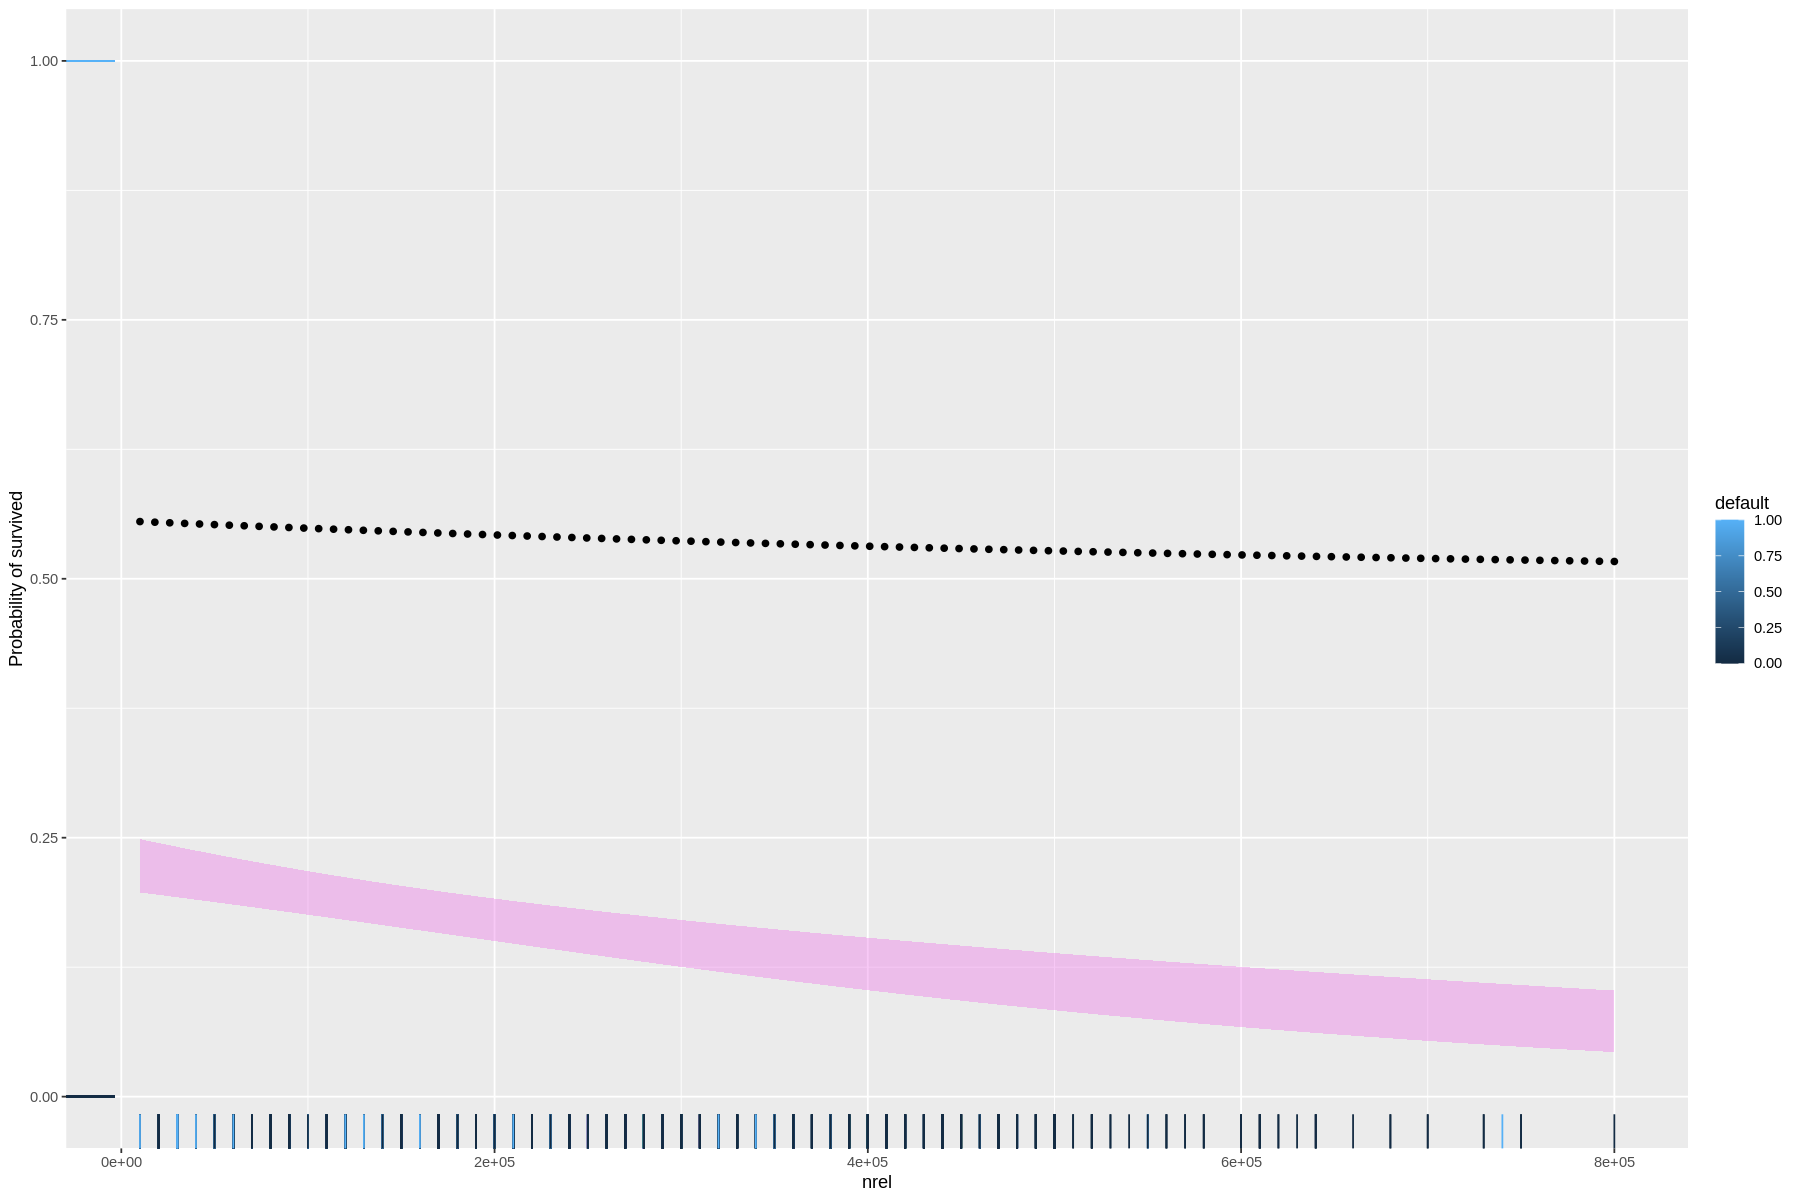

In [135]:
plt <- ggplot(pd, aes(x = limit_bal, y = ilink(fit))) +
    #geom_line() +
     geom_point()+
    geom_rug(aes(y = as.numeric(default), colour = default), data = test_data) +
    #scale_colour_discrete(name = 'Survived') +
    labs(x = 'nrel', y = 'Probability of survived')

  pd <- pd %>%
  mutate(fit_link = predict(best_model, pd, se.fit = TRUE)$fit,
         se_link  = predict(best_model, pd, se.fit = TRUE)$se.fit,
         fit  = ilink(fit_link),
         fit_ul = ilink(fit_link + (quant_n * se_link)),
         fit_ll = ilink(fit_link - (quant_n * se_link)))
## show

plt + geom_ribbon(data = pd,
                  aes(ymin = fit_ll, ymax = fit_ul),fill = "orchid2",
                  alpha = 0.4)

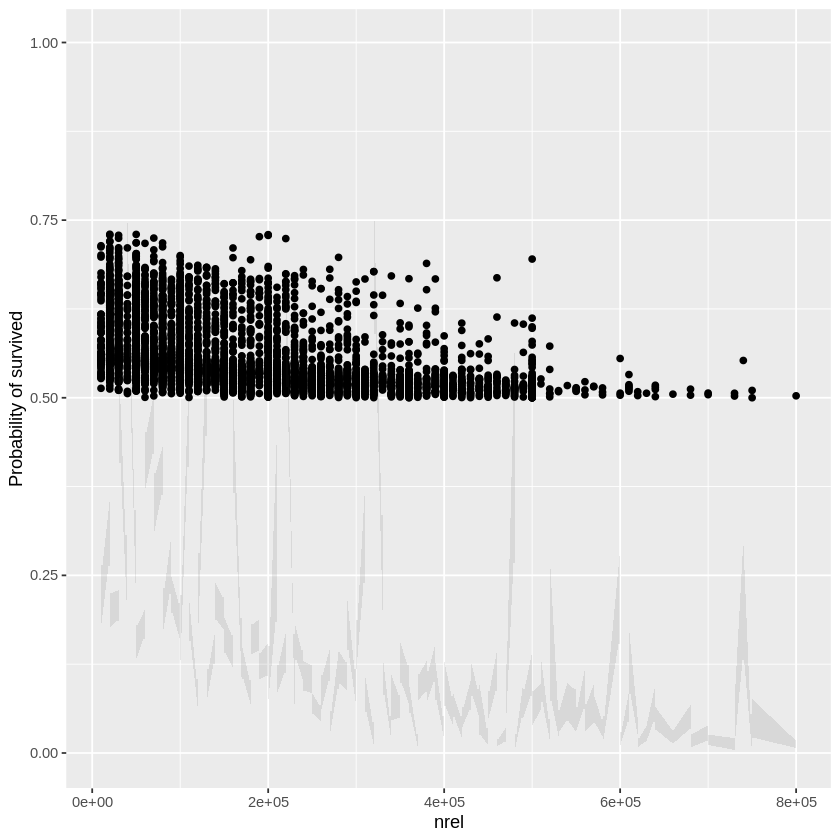

In [121]:
ilink <- family(best_model)$linkinv
quant_t <- qt(0.025, df = df.residual(best_model), lower.tail = FALSE)
quant_n <- qnorm(0.005, lower.tail = FALSE)
## add fit and se.fit on the **link** scale
test_data <- test_data %>%
   mutate(fit_link = predict(best_model, test_data, se.fit = TRUE)$fit,
          se_link  = predict(best_model, test_data, se.fit = TRUE)$se.fit,
          fit  = ilink(fit_link),
          fit_ul = ilink(fit_link + (quant_n * se_link)),
          fit_ll = ilink(fit_link - (quant_n * se_link)))
## show
#head(test_data)

plt + geom_ribbon(data = test_data,
                  aes(ymin = fit_ll, ymax = fit_ul),
                  alpha = 0.1)

In [106]:
data_tr <- train_data %>%
  mutate(fitted = best_model$fitted.values,
          default=as.factor(default),
         #fitted = predict(best_model_f, newdata = data_train_HW_fct, type = "response"),
         predict = as.factor(ifelse(fitted > 0.5, "1", "0")),
         r_deviance_std =rstandard(best_model, type = "deviance"),
         r_pearson_std = rstandard(best_model, type = "pearson") )
head(data_tr)


limit_bal,sex,education,marriage,age,pay_0,pay_6,default,bill_min,bill_max,pay_min,pay_max,fitted,predict,r_deviance_std,r_pearson_std
<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
120000,2,2,2,26,-1,2,1,1725,3455,0,2000,0.1271150,0,2.0317804,2.6213663
90000,2,2,2,34,0,0,0,13559,29239,1000,5000,0.1669482,0,-0.6044993,-0.4477283
50000,1,2,1,57,-1,0,0,5670,35835,679,36681,0.1321649,0,-0.5325673,-0.3903301
500000,1,1,2,29,0,0,0,367965,542653,13750,55000,0.0240844,0,-0.2209030,-0.1571589
140000,2,3,1,28,0,0,0,3719,14096,0,3329,0.1987590,0,-0.6659187,-0.4982067
260000,2,1,2,51,-1,2,0,8517,22287,0,22301,0.1076114,0,-0.4773616,-0.3473851


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


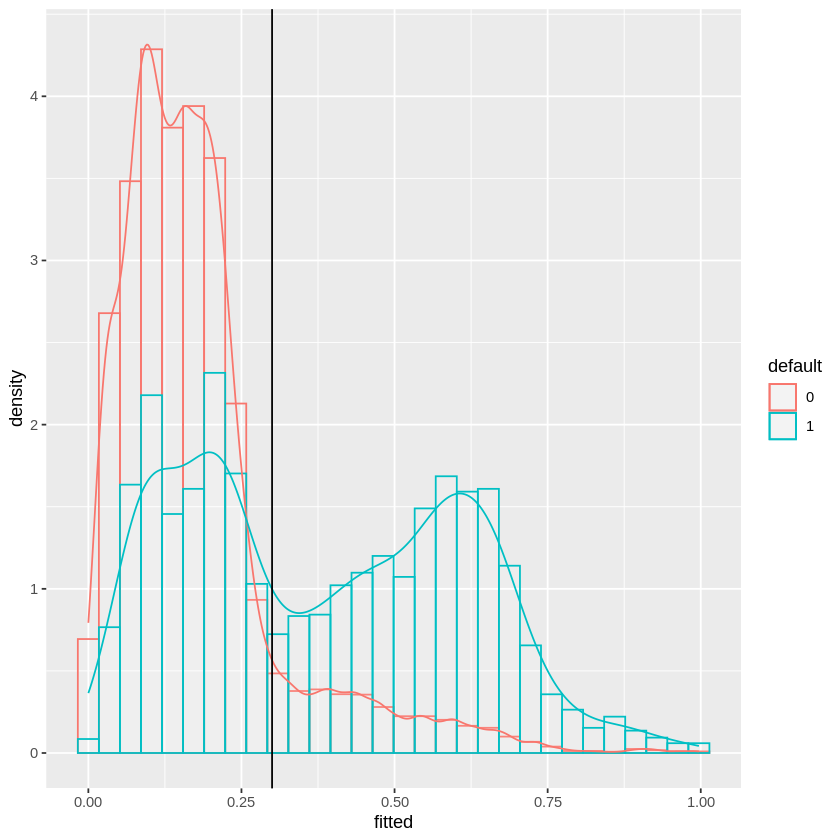

In [108]:
ggplot(data_tr, aes(x=fitted, color=default)) +
  geom_histogram(fill="white",aes(y=..density..), alpha=0.1, position="identity") +
   geom_density(aes(y=..density..)) + geom_vline(xintercept = 0.3)


In [109]:
data_tr <- data_tr %>%
  mutate(predict_03 = as.factor(ifelse(fitted > 0.3, "1", "0")) )
head(data_tr)
confusionMatrix(data_tr$predict_03, data_tr$default, positive = "1")

limit_bal,sex,education,marriage,age,pay_0,pay_6,default,bill_min,bill_max,pay_min,pay_max,fitted,predict,r_deviance_std,r_pearson_std,predict_03
<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>
120000,2,2,2,26,-1,2,1,1725,3455,0,2000,0.1271150,0,2.0317804,2.6213663,0
90000,2,2,2,34,0,0,0,13559,29239,1000,5000,0.1669482,0,-0.6044993,-0.4477283,0
50000,1,2,1,57,-1,0,0,5670,35835,679,36681,0.1321649,0,-0.5325673,-0.3903301,0
500000,1,1,2,29,0,0,0,367965,542653,13750,55000,0.0240844,0,-0.2209030,-0.1571589,0
140000,2,3,1,28,0,0,0,3719,14096,0,3329,0.1987590,0,-0.6659187,-0.4982067,0
260000,2,1,2,51,-1,2,0,8517,22287,0,22301,0.1076114,0,-0.4773616,-0.3473851,0


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 10554  1527
         1  1390  1890
                                          
               Accuracy : 0.8101          
                 95% CI : (0.8038, 0.8163)
    No Information Rate : 0.7776          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.4431          
                                          
 Mcnemar's Test P-Value : 0.0118          
                                          
            Sensitivity : 0.5531          
            Specificity : 0.8836          
         Pos Pred Value : 0.5762          
         Neg Pred Value : 0.8736          
             Prevalence : 0.2224          
         Detection Rate : 0.1230          
   Detection Prevalence : 0.2135          
      Balanced Accuracy : 0.7184          
                                          
       'Positive' Class : 1               
                  

In [ ]:
data_te <- test_data %>%
  mutate(fitted = predict(best_model, newdata = data_te, type = "response"),#response - modelujeme odozvu
         predict = as.factor(ifelse(fitted > 0.3, "1", "0")) ) %>%
         arrange(limit_bal)
head(data_te)



In [ ]:
install.packages("tidyverse")
library(tidyverse)

In [ ]:
plt <- ggplot(data_te, aes(x = limit_bal, y = fitted)) +
    geom_line() +
    geom_rug(aes(y = default, colour = default), data = data_tr) +
    #scale_colour_discrete(name = 'Survived') +
    labs(x = 'Limit_bal', y = 'Probability of survived')
plt

In [ ]:
plt + geom_ribbon(data = data_te,
                  aes(ymin = fit_ll, ymax = fit_ul),
                  alpha = 0.1)

In [ ]:
install.packages("pROC")
library(pROC)

In [ ]:
p_m1<-plot.roc(data_tr$default, data_tr$fitted,          # data
         percent = TRUE,                    # show all values in percent
         #partial.auc=c(100, 90),
         #partial.auc.correct=True,          # define a partial AUC (pAUC)
         print.auc=TRUE,
         #display pAUC value on the plot with following options:
         #print.auc.pattern = "Corrected pAUC (100-90%% SP):\n%.1f%%",
         #print.auc.col = "#1c61b6",
         #auc.polygon = TRUE,
         #auc.polygon.col = "#1c61b6",       # show pAUC as a polygon
         #max.auc.polygon = TRUE,
         #max.auc.polygon.col = "#1c61b622", # also show the 100% polygon
         main = "Partial AUC (pAUC)")


Na základe AUC krivky je plocha pod krivkou 76.5%

## 05 - Logistická regrese -  strojové učení

* Sestavte workflow (pipeline) na trenovacích datech pro logistickou regresi s použitím regularizace (elestic-net), která bude obsahovat
 *   Přípravu proměnných, transformaci, one-hot encoding, normalizaci, ... (Možno použít recipe z tidy models)
 *   Hledání "optimálního" nastavení hyperparametru v regularizaci.
 *   k-fold cross validaci

* Pomocí předchozí pipline/workflow vyberte hodnotu hyperparametru. Pokud chceme uvedený algoritmus použít k detekci pacientů s nemocí srdce, jakou statistiku bychom měli sledovat abychom omylem nepropustili nemocného domů jako zdravého?

* Spočtěte a porovnejte statistiky používané při binární klasifikaci na trénovacích a testovacích datech. Vykreslete ROC křivku a spočtěte plochu pod ní jak pro testovací tak trénovací data. Co můžeme říci o kvalitě modelu z této sekce 05 a modelu z předchozí 04?




## Poznámky k odevzdání a vypracování

* Úkol vypracujte ve skupině. Pokud se budete s někým radit mimo skupinu, nezapomeňte u dané odpovědi uvést zdroj vašich informací.

* Úkol můžete odevzdávat jako spustitelný jupyter notebook na google colab (stačí odevzdat link na github). Před odevzdáním ZKONTROLUJTE, že buňky na sebe navazují a že lze NB postupně projít a jednotlivé buňky nezahlásí chybu.

* Deadline pro odevzdání je stanoven na sředu 21.6.2023.

* Není možno odevzdání opakovat. Odevzdaný úkol zkontroluji a buď zápočet získáte, nebo ne. Je vyžadováno mít alespoň 75% úkolů správně.

* V případě otázek se ptejte veřejně v general kanále v MS Teams. Ostatní mohou mít podobné problémy a tudíž pokud je někde například nejasné zadání, tak ať mají všichni stejnou příležitost.

* Možno psát a odevzdat v Pythonu.